In [74]:
import pandas as pd
from pathlib import Path
import glob
import matplotlib.pyplot as plt
import numpy as np

In [75]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [76]:
"""
import matplotlib
fontsize = 14
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
"""

"\nimport matplotlib\nfontsize = 14\nmatplotlib.rcParams['mathtext.fontset'] = 'stix'\nmatplotlib.rcParams['font.family'] = 'STIXGeneral'\n"

In [77]:
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 200)

## ULX systems dataframe
This dataframe contains the ULXs selected for further analysis, originally obtained from the 36,420 systems created via STARTRACK by Greg.

In [78]:
def load_systems_dataframe(ulx_only=False, beamed=False, half_opening_l_45=False):
    systems_df_path = Path('../data/processed/all_systems_df.csv')
    df = pd.read_csv(systems_df_path)
    if ulx_only:
        df = df[df['Lx'] > 1E39]
    if beamed:
        df = df[df['b'] < 1]
    if half_opening_l_45:
        df = df[df['theta_half_deg'] < 45]
    df = df.reset_index()
    df = df.drop(columns=['index', 'Unnamed: 0'])
    return df

In [79]:
systems_df = load_systems_dataframe(True, False, False)
junk_columns = ['mdot_gs', 'XLsph', 'XLsph2', 'ratio', 'ratio_beamed', 'theta', 'theta_deg']
gr_columns = ['zeta', 'r_schw', 'r_isco_nospin', 'r_isco', 'r_out', 'P_wind', 'f_wind', 'r_sph']
systems_df.drop([*junk_columns, *gr_columns], axis=1) #Drop unused/axilary column headers

systems_df[['Z', 'tage', 'm', 'mdot', 'is_bh', 'b', 'Lx', 'LEdd', 'LXtot']]

,Z,tage,m,mdot,is_bh,b,Lx,LEdd,LXtot
0,0.0002,10.0,25.9,3.90,1,1.000000,8.641181e+39,3.108000e+39,8.641181e+39
1,0.0002,10.0,28.3,2.70,1,1.000000,7.892165e+39,3.396000e+39,7.892165e+39
2,0.0002,10.0,15.5,1.70,1,1.000000,4.581845e+39,1.860000e+39,4.581845e+39
3,0.0002,10.0,24.6,36.00,1,0.021967,6.792264e+41,2.952000e+39,1.492042e+40
4,0.0002,10.0,28.8,6.70,1,0.869234,1.278377e+40,3.456000e+39,1.111208e+40
...,...,...,...,...,...,...,...,...,...
987,0.0002,500.0,1.1,0.30,0,0.109805,5.108769e+39,1.320000e+38,5.609677e+38
988,0.0020,1000.0,1.3,6.10,0,0.003200,3.458794e+41,1.560000e+38,1.106814e+39
989,0.0002,1000.0,1.3,0.20,0,0.345069,1.662420e+39,1.560000e+38,5.736488e+38
990,0.0200,2000.0,1.3,0.29,0,0.164123,3.848411e+39,1.560000e+38,6.316127e+38


### Additional columns
These columns are for various quantities that we have not yet used...

In [131]:
systems_df[gr_columns]

,zeta,r_schw,r_isco_nospin,r_isco,r_out,P_wind,f_wind,r_sph
0,NaN,7640261.72,22920785.16,1.25,NaN,NaN,NaN,7.414565
1,NaN,8348239.64,25044718.92,1.25,NaN,NaN,NaN,4.697839
2,NaN,4572357.40,13717072.20,1.25,NaN,NaN,NaN,5.400551
3,4.691953,7256773.68,21770321.04,1.25,1.367081e+04,3.485596e+07,2.868949e-08,72.059002
4,2.000000,8495735.04,25487205.12,1.25,1.288436e+02,6.657966e+01,1.501960e-02,11.455213
...,...,...,...,...,...,...,...,...
987,2.000000,324489.88,973469.64,6.00,1.377452e+04,1.910142e+09,5.235213e-10,154.704125
988,36.703821,383488.04,1150464.12,6.00,3.822688e+06,2.797528e+16,3.574585e-17,2661.704312
989,2.000000,383488.04,1150464.12,6.00,2.472582e+03,1.668124e+07,5.994757e-08,87.268994
990,2.000000,383488.04,1150464.12,6.00,7.537974e+03,4.007780e+08,2.495147e-09,126.540041


## First batch of Alive/dead simulation results
These results were the original set where 500 ULXs were sampled in a desired neutron star, and each drawn system had lightcurves created corresponding to a single random inclination and over all precessional angles from 1 - 45.

After around 5m rows, I then realised that this method was somewhat inefficient. Instead, one need not specify a black hole to neutron star ratio when creating the lightcurves but instead create many lightcurves for the 992 ULX systems, calculating their alive/dead time, then sampling from these results in the required BH/NS ratio.

In doing this, one problem I realised was that some of the ULX systems were not drawn enough times and so their inclinations were poorly sampled...

There was no need to toss out the old simulations, as it was only a case of sampling more and appending to the already simulated lightcurves.

In [81]:
#I only ran these simulations to 0.4 BH_NS ratio before realising my method could be faster.
df_a = pd.read_csv('../data/processed/df_a_full.csv')
df_a = df_a.drop(['Unnamed: 0', 'Unnamed: 0.1'] , axis=1)
df_a = df_a[['system_num', 'BH_NS', 'inclination', 'dincl', 'alive', 'dead', 'ratio']]
df_a

,system_num,BH_NS,inclination,dincl,alive,dead,ratio
0,938,0.1,64.82,18.0,0.000000,49.968944,0.000000
1,938,0.1,64.82,9.0,0.000000,49.968944,0.000000
2,938,0.1,64.82,3.0,0.000000,49.968944,0.000000
3,938,0.1,64.82,19.0,3.897136,46.029198,0.078058
4,938,0.1,64.82,24.0,11.093265,38.849686,0.222119
...,...,...,...,...,...,...,...
4958815,431,0.4,74.40,41.0,35.875744,14.055602,0.718501
4958816,431,0.4,74.40,44.0,37.198629,12.736162,0.744944
4958817,431,0.4,74.40,45.0,37.529701,12.380198,0.751949
4958818,431,0.4,74.40,42.0,36.334194,13.581310,0.727914


In [82]:
my_list = list(systems_df.is_bh)
Z_list = list(systems_df.Z)

is_bh = [my_list[s] for s in df_a['system_num']]
Z = [Z_list[s] for s in df_a['system_num']]
df_a['is_bh'] = is_bh
df_a['Z'] = Z
df_a.head()

,system_num,BH_NS,inclination,dincl,alive,dead,ratio,is_bh,Z
0,938,0.1,64.82,18.0,0.000000,49.968944,0.000000,0,0.002
1,938,0.1,64.82,9.0,0.000000,49.968944,0.000000,0,0.002
2,938,0.1,64.82,3.0,0.000000,49.968944,0.000000,0,0.002
3,938,0.1,64.82,19.0,3.897136,46.029198,0.078058,0,0.002
4,938,0.1,64.82,24.0,11.093265,38.849686,0.222119,0,0.002


In [83]:
df_a_transient = df_a[(df_a['ratio']!=0) & (df_a['ratio']!=1)]

No handles with labels found to put in legend.


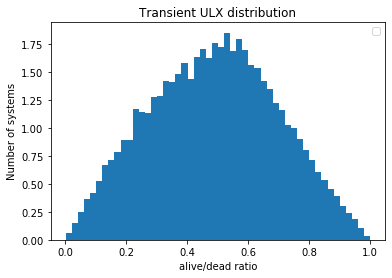

In [84]:
plt.xlabel('alive/dead ratio')
plt.ylabel('Number of systems')
plt.title('Transient ULX distribution')
plt.hist(df_a_transient['ratio'], bins=50, density=True)
plt.legend()

In [85]:
#I've realised that some of the systems have far less simulations on them than others, this needs to be sorted
print(df_a['system_num'].value_counts().sort_values())

142     1620
887     1710
454     1710
334     1800
77      1800
699     1845
184     1845
744     1845
159     1845
888     1890
416     1935
221     2025
69      2025
191     2070
63      2070
474     2070
529     2070
807     2115
278     2115
510     2115
166     2160
453     2160
303     2160
740     2160
408     2160
103     2205
350     2205
32      2205
23      2205
515     2205
881     2205
251     2250
517     2250
274     2250
695     2295
786     2295
509     2295
464     2340
248     2340
164     2340
867     2340
830     2385
906     2385
186     2385
381     2385
809     2430
777     2430
35      2430
605     2475
22      2475
701     2475
886     2475
418     2475
410     2475
914     2475
108     2520
3       2520
691     2520
784     2520
140     2565
492     2565
678     2565
789     2565
210     2610
917     2610
127     2655
929     2655
618     2700
363     2700
374     2700
855     2700
431     2700
861     2700
463     2745
51      2745
661     2745
579     2790

In [86]:
print('number of neutron stars: 0, vs black holes: 1 simulated in original batch')
df_a['is_bh'].value_counts()

number of neutron stars: 0, vs black holes: 1 simulated in original batch


0    4748130
1     210690
Name: is_bh, dtype: int64

Text(0.5, 0.98, 'Inclination histogram for poorly sampled inclination system #159')

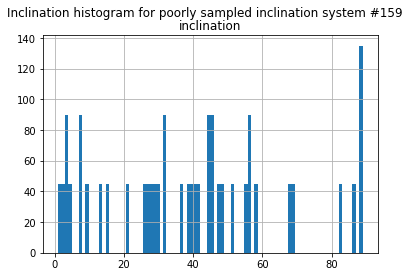

In [87]:
#Example of poorly sampled system
df_a[df_a['system_num'] == 159].hist('inclination', bins=90)
plt.suptitle('Inclination histogram for poorly sampled inclination system #159')

Text(0.5, 0, 'alive/dead ratio')

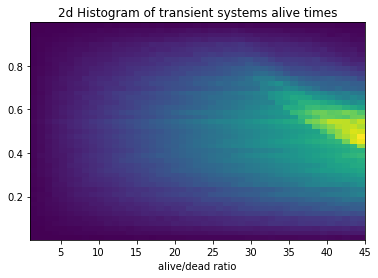

In [88]:
# df_sub = df_a_transient[df_a_transient['Z'] == 0.2]
df_sub = df_a_transient
plt.hist2d(df_sub['dincl'], df_sub['ratio'], bins=45)
plt.title('2d Histogram of transient systems alive times')
plt.xlabel('dincl')
plt.xlabel('alive/dead ratio')

In [89]:
systems_df['P_wind_years'] = systems_df['P_wind']/60/60/24/365

# Checking new lightcurve simulations

After realising that some systems were poorly sampled, I re-ran the simulations iterating over the following:
    
    all systems
    inclination 0 - 90 steps of 1
    dincl 1 - 45 steps of 1

In [90]:
csv_files = glob.glob('../src/new_curve_results/*.csv')
res = {}
for file in csv_files:
    res[file] = pd.read_csv(file)
df_new = pd.concat(res.values())
df_new = df_new.drop(['Unnamed: 0'], axis=1)
df_new['ratio'] = df_new['alive'] / (df_new['alive']+df_new['dead'])
#df_new.loc[np.isnan(df_new['ratio']),'ratio']=0
df_new

,system_id,period,phase,theta,inclination,dincl,beta,dopulse,norm,alive,dead,ratio
0,948,10.0,0.0,43.427212,71,31,0.2,0,1.0,7.023091,42.927291,0.140601
1,977,10.0,0.0,7.327790,27,1,0.2,0,1.0,49.968944,0.000000,1.000000
2,786,10.0,0.0,5.081856,43,15,0.2,0,1.0,49.968944,0.000000,1.000000
3,334,10.0,0.0,4.584886,78,15,0.2,0,1.0,20.574921,29.344748,0.412161
4,463,10.0,0.0,36.829453,79,43,0.2,0,1.0,13.660226,36.250845,0.273691
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,939,10.0,0.0,29.161106,35,35,0.2,0,1.0,23.641319,26.266711,0.473698
49996,810,10.0,0.0,4.584886,0,19,0.2,0,1.0,49.968944,0.000000,1.000000
49997,786,10.0,0.0,5.081856,27,21,0.2,0,1.0,49.968944,0.000000,1.000000
49998,290,10.0,0.0,4.970599,83,41,0.2,0,1.0,9.986982,39.954347,0.199974


In [91]:
is_bh = [my_list[s] for s in df_new['system_id']]
Z = [Z_list[s] for s in df_new['system_id']]
df_new['is_bh'] = is_bh
df_new['Z'] = Z

In [92]:
df_new_transient = df_new[(df_new['ratio'] != 0) & (df_new['ratio'] != 1)]

In [93]:
df_new[df_new.duplicated()].sort_values(by='system_id')

,system_id,period,phase,theta,inclination,dincl,beta,dopulse,norm,alive,dead,ratio,is_bh,Z
21376,3,10.0,0.0,12.031480,87,38,0.2,0,1.0,27.525101,22.395984,0.551372,1,0.0002
16936,3,10.0,0.0,12.031480,66,13,0.2,0,1.0,24.514222,25.424591,0.490885,1,0.0002
16913,3,10.0,0.0,12.031480,64,26,0.2,0,1.0,26.021030,23.888142,0.521368,1,0.0002
26460,3,10.0,0.0,12.031480,72,28,0.2,0,1.0,21.329186,28.573159,0.427419,1,0.0002
33725,3,10.0,0.0,12.031480,78,45,0.2,0,1.0,30.428129,19.517700,0.609223,1,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12110,991,10.0,0.0,40.503258,8,25,0.2,0,1.0,49.968944,0.000000,1.000000,0,0.0002
18067,991,10.0,0.0,40.503258,35,0,0.2,0,1.0,49.968944,0.000000,1.000000,0,0.0002
3327,991,10.0,0.0,40.503258,73,6,0.2,0,1.0,0.000000,49.968944,0.000000,0,0.0002
19637,991,10.0,0.0,40.503258,50,13,0.2,0,1.0,14.580036,35.357268,0.291967,0,0.0002


In [94]:
df_new_transient.drop_duplicates()

,system_id,period,phase,theta,inclination,dincl,beta,dopulse,norm,alive,dead,ratio,is_bh,Z
0,948,10.0,0.0,43.427212,71,31,0.2,0,1.0,7.023091,42.927291,0.140601,0,0.0020
3,334,10.0,0.0,4.584886,78,15,0.2,0,1.0,20.574921,29.344748,0.412161,1,0.0020
4,463,10.0,0.0,36.829453,79,43,0.2,0,1.0,13.660226,36.250845,0.273691,1,0.0020
6,789,10.0,0.0,41.768069,24,40,0.2,0,1.0,35.478393,14.441280,0.710710,1,0.0002
7,990,10.0,0.0,33.292731,47,44,0.2,0,1.0,20.537608,29.389390,0.411353,0,0.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49888,3,10.0,0.0,12.031480,54,18,0.2,0,1.0,36.128323,13.779255,0.723905,1,0.0002
49893,510,10.0,0.0,40.973936,71,39,0.2,0,1.0,15.124324,34.818338,0.302834,1,0.0020
49899,431,10.0,0.0,4.584886,74,20,0.2,0,1.0,25.142652,24.795647,0.503474,1,0.0002
49919,579,10.0,0.0,17.781172,68,10,0.2,0,1.0,15.884795,34.038518,0.318184,1,0.0002


/home/nk7g14/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


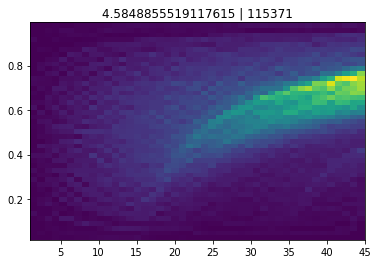

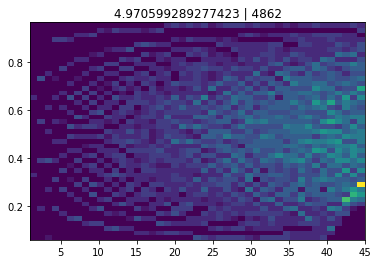

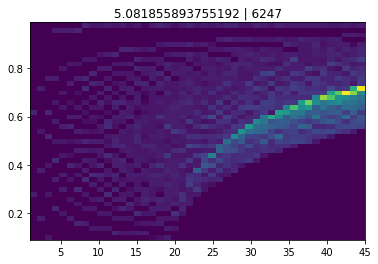

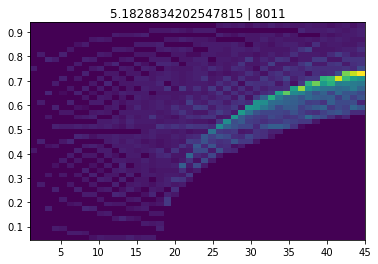

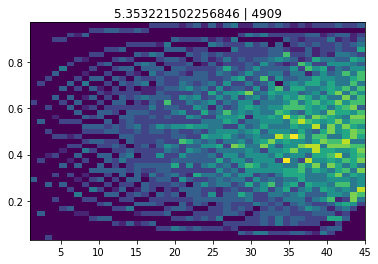

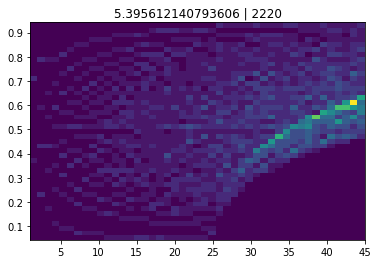

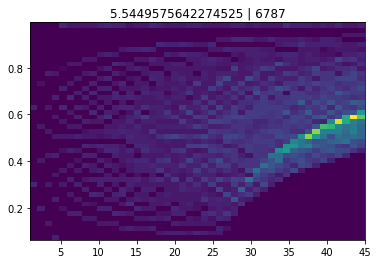

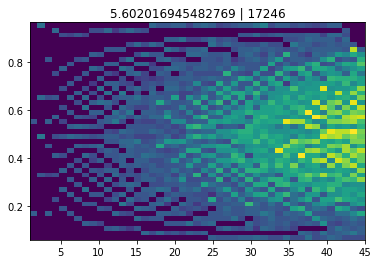

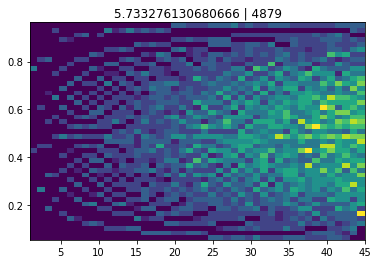

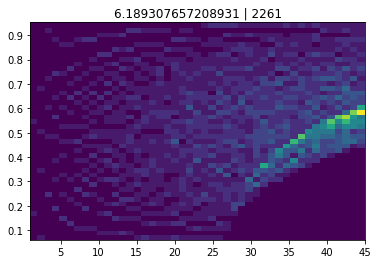

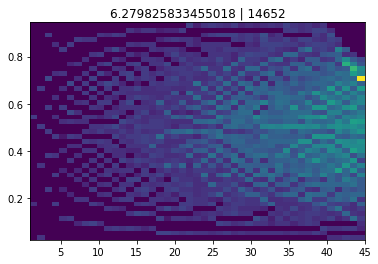

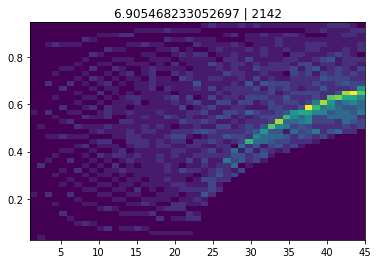

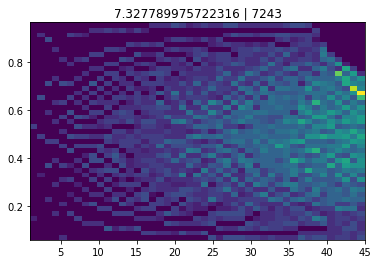

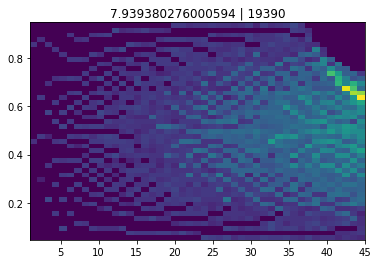

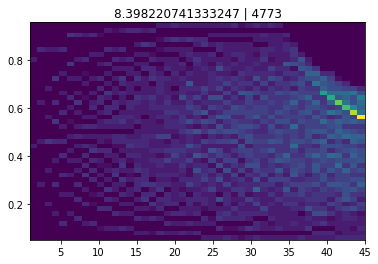

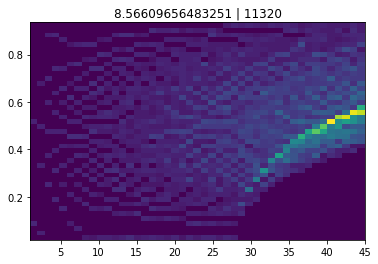

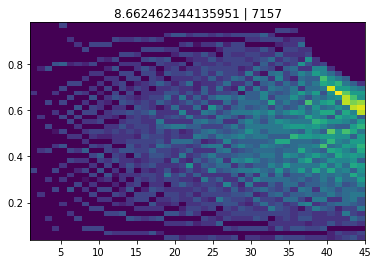

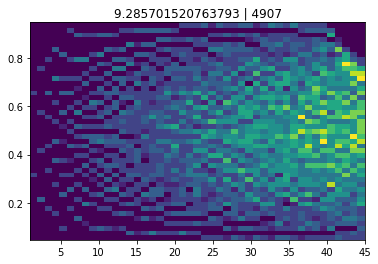

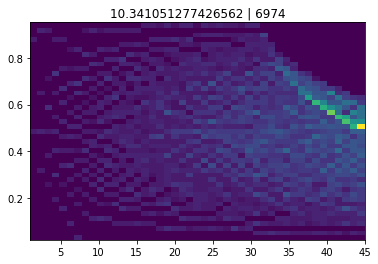

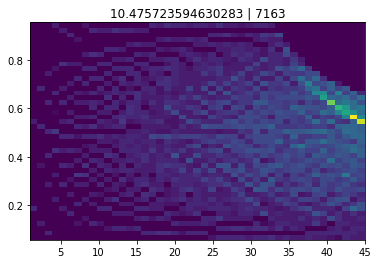

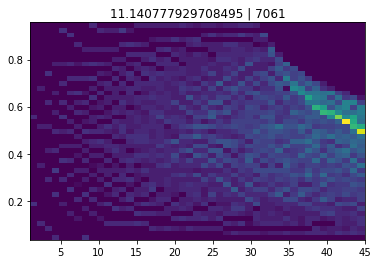

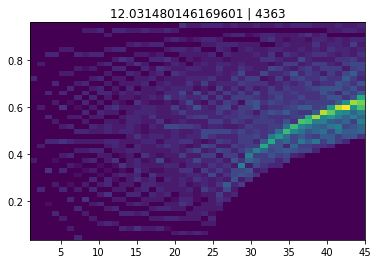

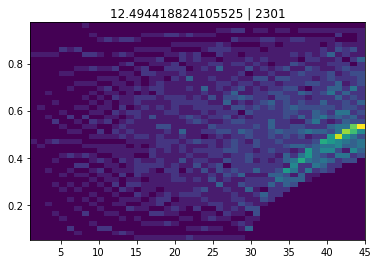

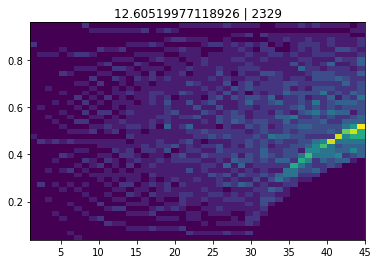

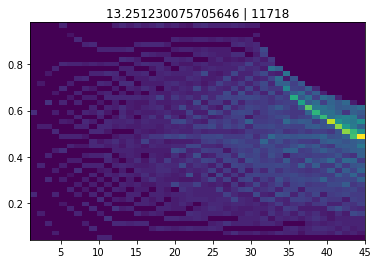

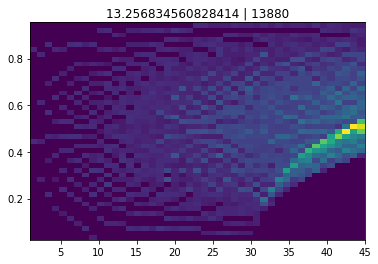

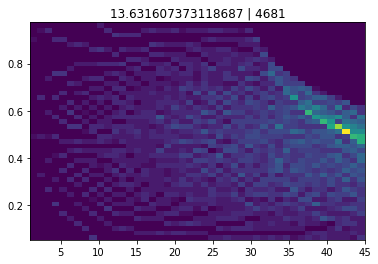

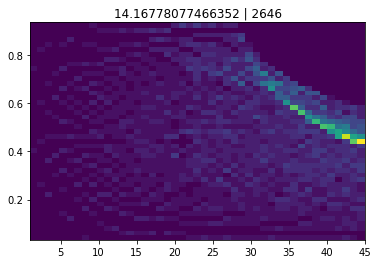

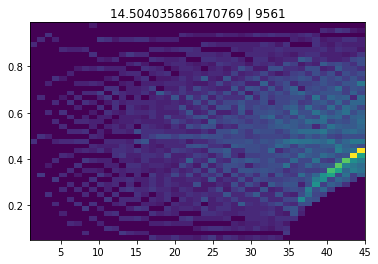

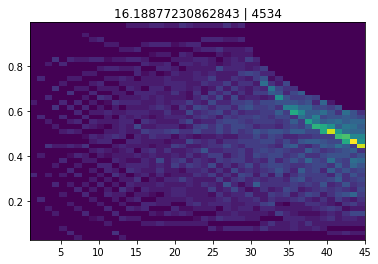

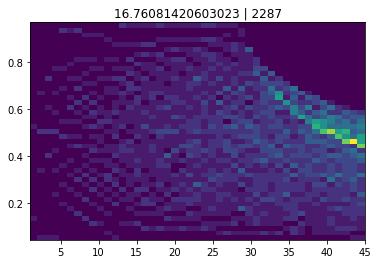

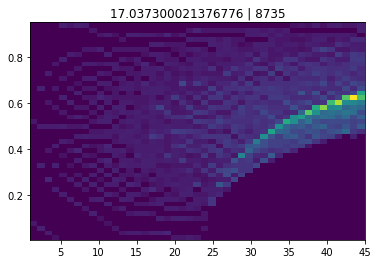

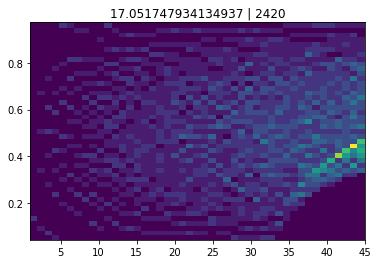

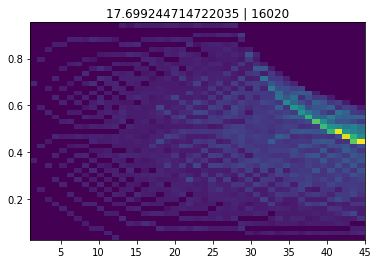

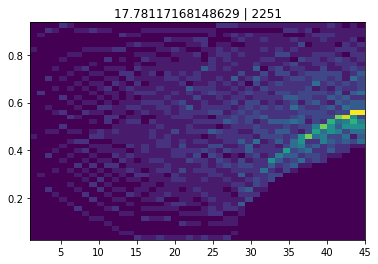

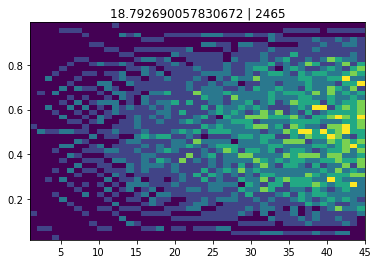

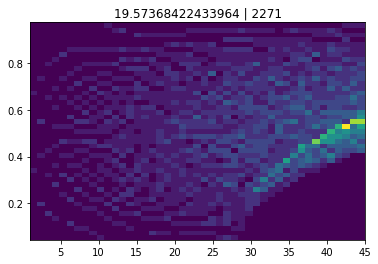

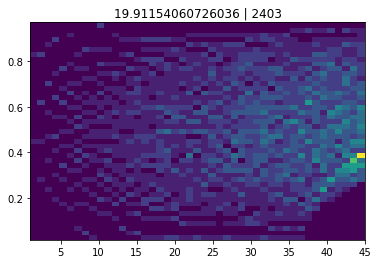

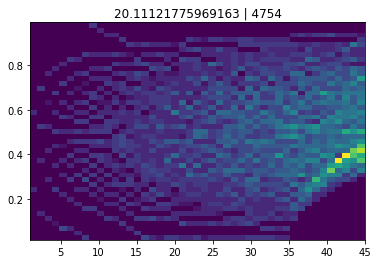

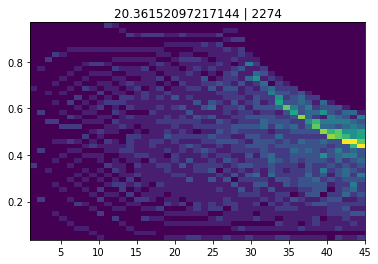

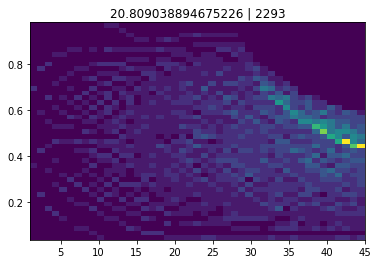

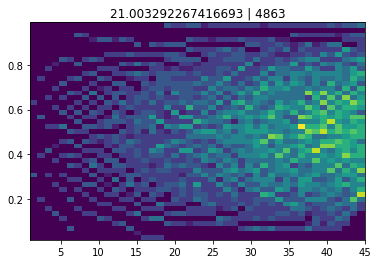

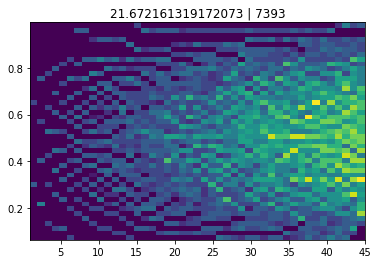

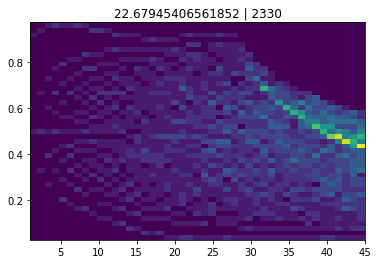

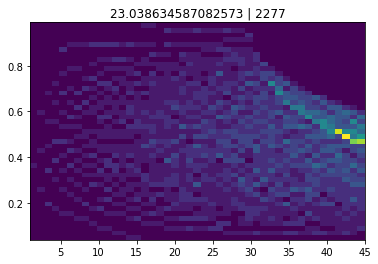

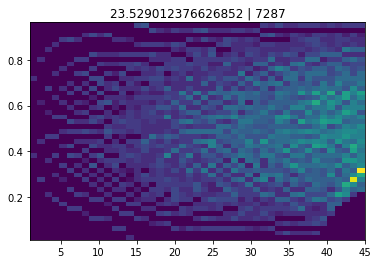

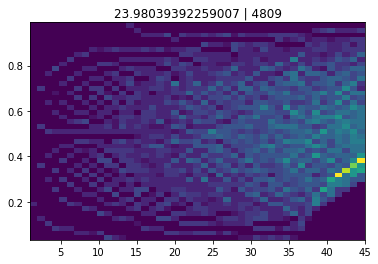

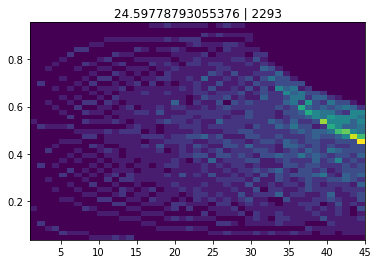

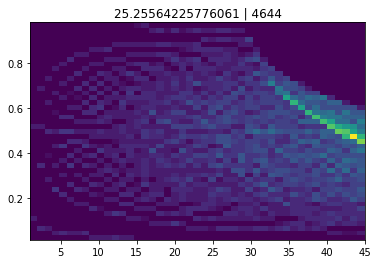

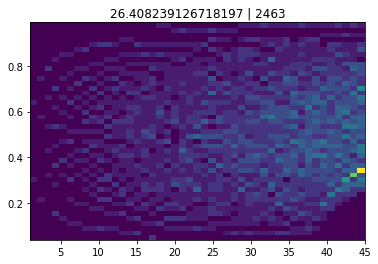

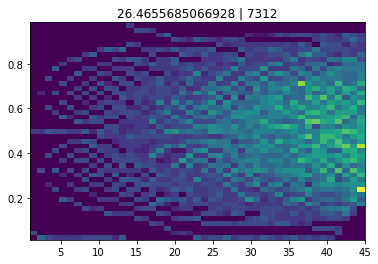

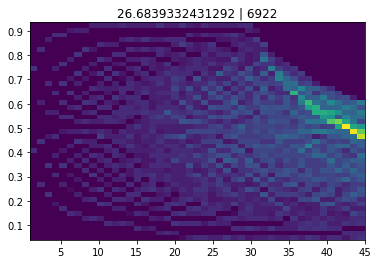

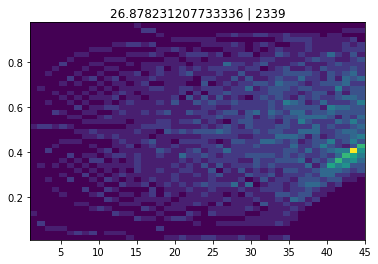

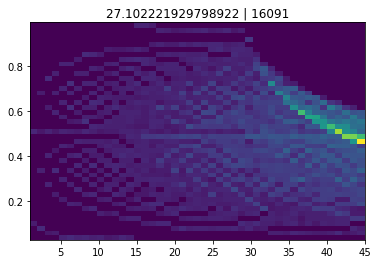

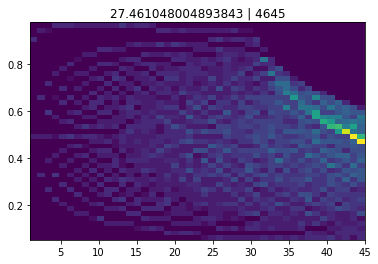

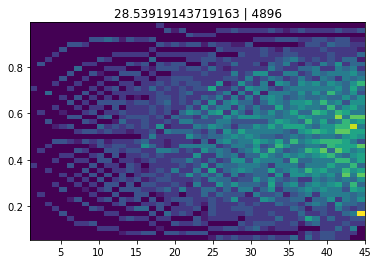

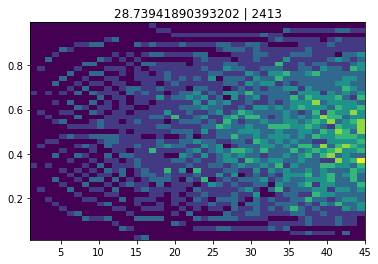

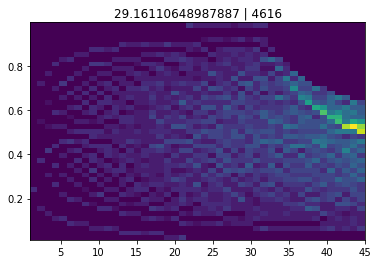

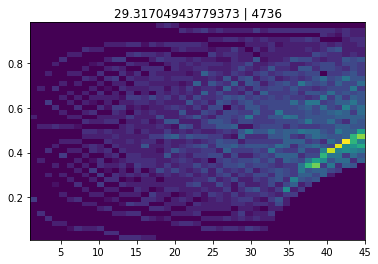

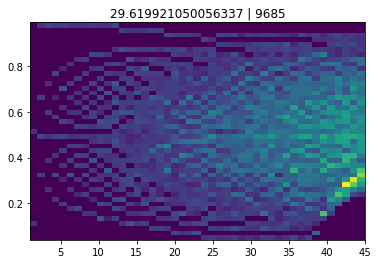

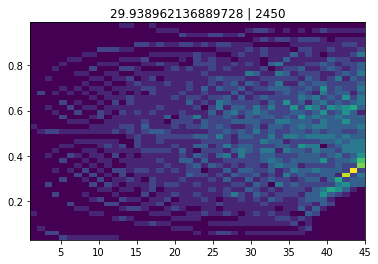

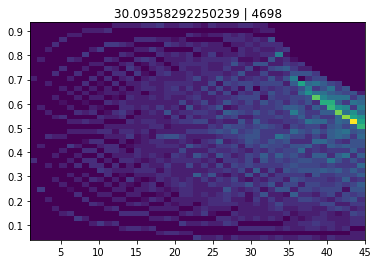

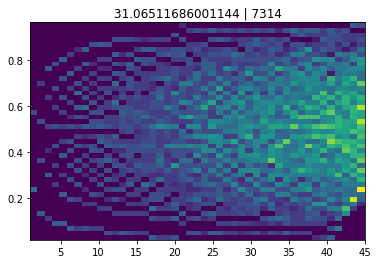

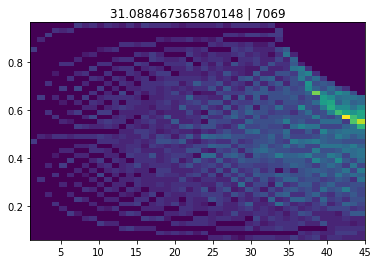

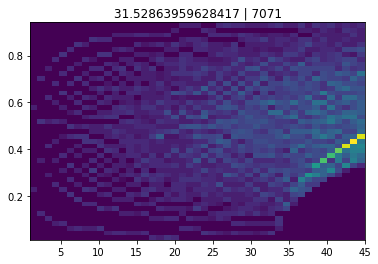

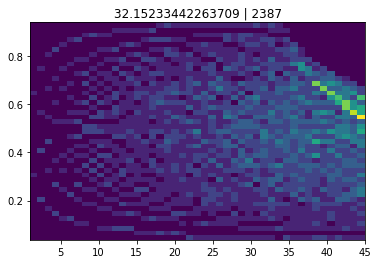

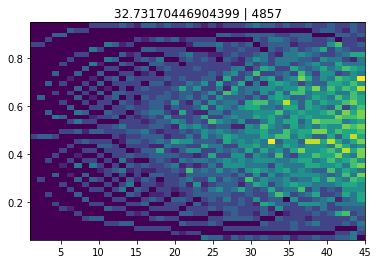

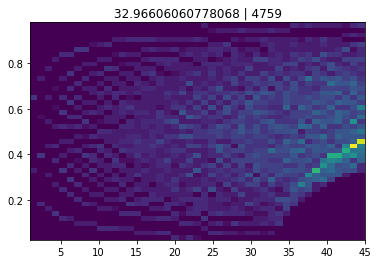

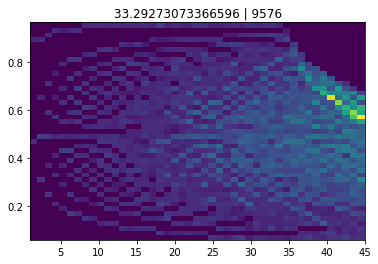

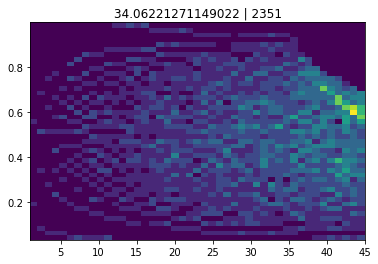

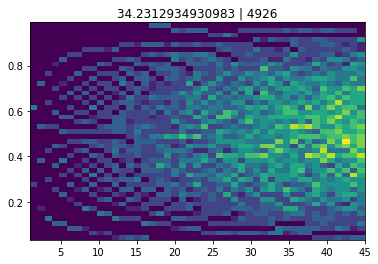

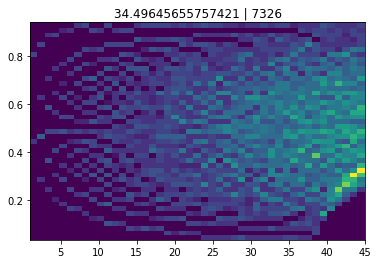

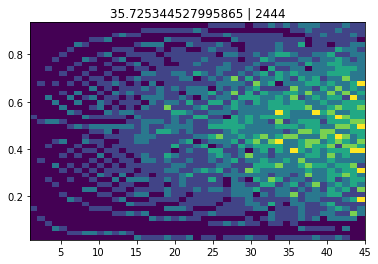

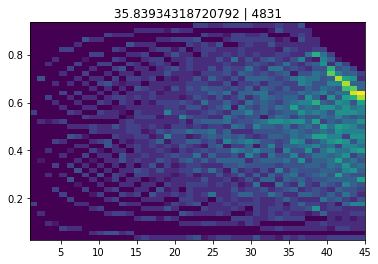

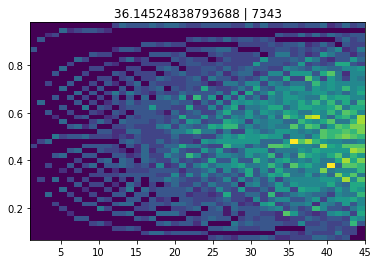

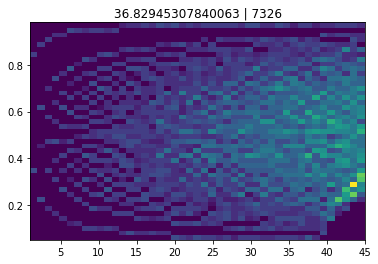

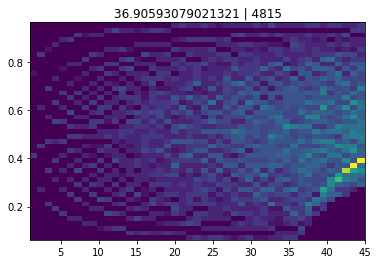

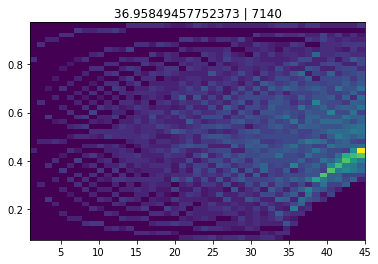

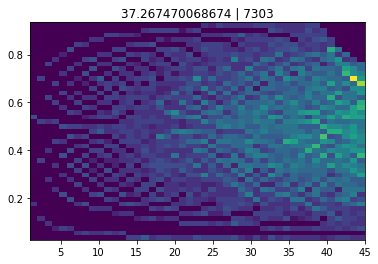

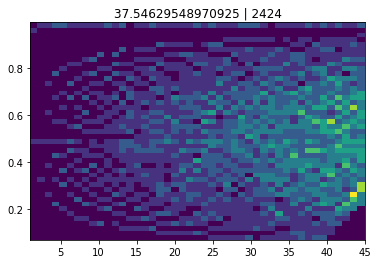

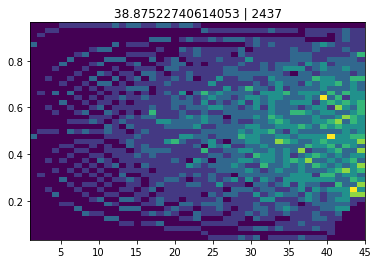

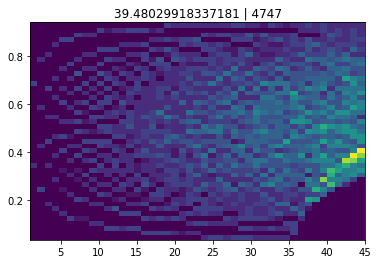

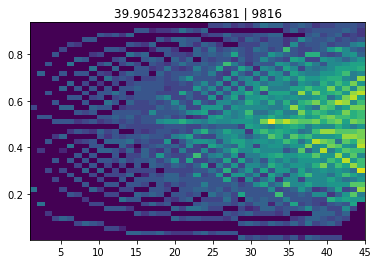

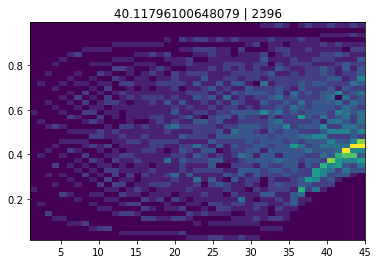

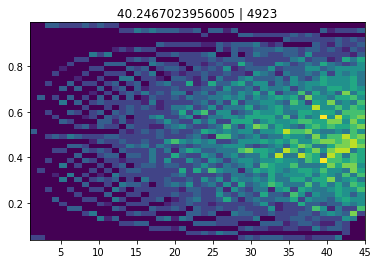

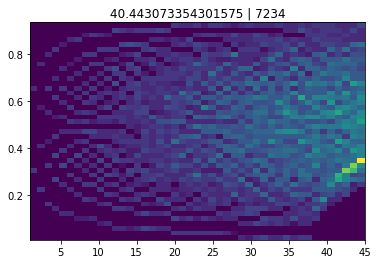

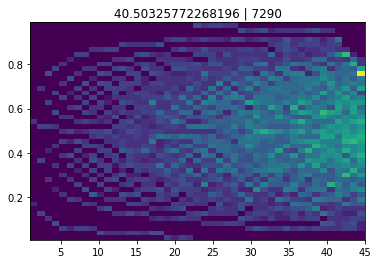

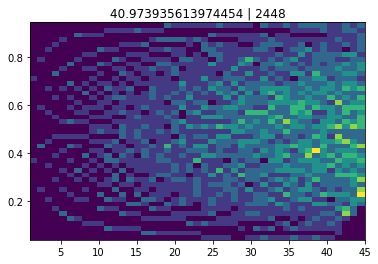

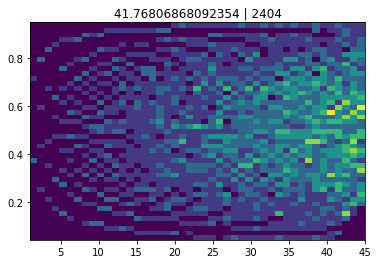

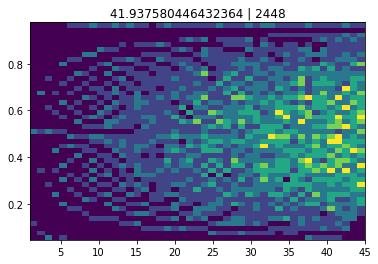

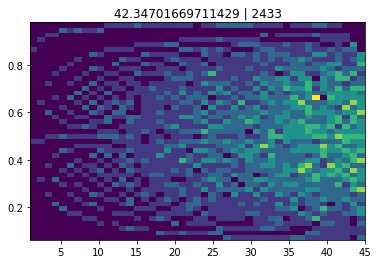

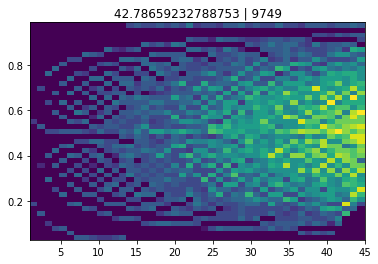

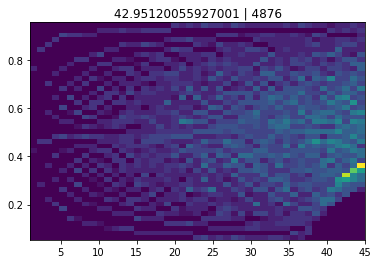

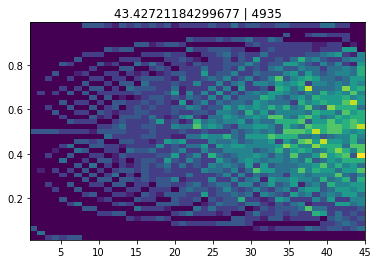

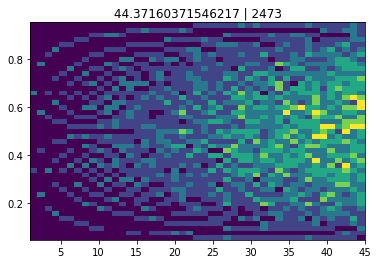

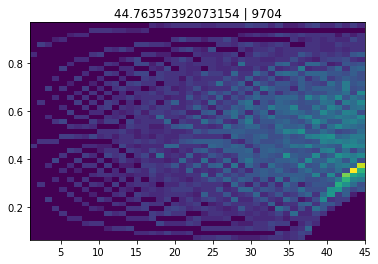

In [95]:
for i in np.sort(df_new_transient['theta'].unique()):
    sub = df_new_transient[df_new_transient['theta'] == i]
    plt.figure()
    plt.title(str(i)+' | '+str(len(sub)))
    plt.hist2d(sub['dincl'], sub['ratio'], bins=45)

In [96]:
df_unique = df_new[df_new.duplicated(subset=None, keep='first')]
df_new_transient = df_unique[(df_unique['ratio'] != 0) & (df_unique['ratio'] != 1)]
df_new['ratio'].value_counts()

1.000000    442440
0.000000    309409
0.420560       824
0.267610       793
0.418508       746
             ...  
0.803651         1
0.054821         1
0.493905         1
0.456753         1
0.788742         1
Name: ratio, Length: 21877, dtype: int64

Text(0, 0.5, 'ratio')

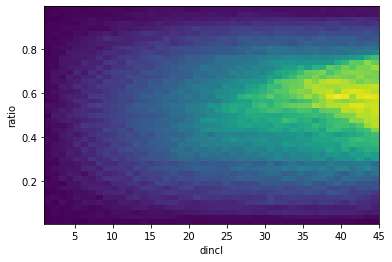

In [128]:
plt.hist2d(df_new_transient['dincl'], df_new_transient['ratio'], bins=45)
plt.xlabel('dincl')
plt.ylabel('ratio')


In [98]:
df736 = df_new[df_new['system_id'] == 736]
df736 = df_new[df_new['inclination'] == 0]
df736 = df736.sort_values(by=['theta', 'inclination', 'dincl'])
df736 = df736[df736['theta'] == df736['theta'].unique()[0]]
df736

,system_id,period,phase,theta,inclination,dincl,beta,dopulse,norm,alive,dead,ratio,is_bh,Z
4764,410,10.0,0.0,4.584886,0,0,0.2,0,1.0,49.968944,0.0,1.0,1,0.0020
6816,529,10.0,0.0,4.584886,0,0,0.2,0,1.0,49.968944,0.0,1.0,1,0.0020
43640,159,10.0,0.0,4.584886,0,0,0.2,0,1.0,49.968944,0.0,1.0,1,0.0020
17361,810,10.0,0.0,4.584886,0,0,0.2,0,1.0,49.968944,0.0,1.0,1,0.0020
18251,886,10.0,0.0,4.584886,0,0,0.2,0,1.0,49.968944,0.0,1.0,1,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23268,937,10.0,0.0,4.584886,0,45,0.2,0,1.0,49.968944,0.0,1.0,0,0.0020
31011,408,10.0,0.0,4.584886,0,45,0.2,0,1.0,49.968944,0.0,1.0,1,0.0020
1370,529,10.0,0.0,4.584886,0,45,0.2,0,1.0,49.968944,0.0,1.0,1,0.0020
4179,529,10.0,0.0,4.584886,0,45,0.2,0,1.0,49.968944,0.0,1.0,1,0.0020


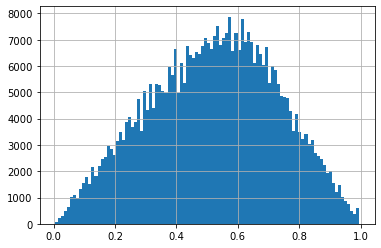

In [99]:
df_new_transient['ratio'].hist(bins=100)

In [100]:
df_new_transient

,system_id,period,phase,theta,inclination,dincl,beta,dopulse,norm,alive,dead,ratio,is_bh,Z
1151,883,10.0,0.0,5.602017,36,42,0.2,0,1.0,27.593444,22.331881,0.552694,0,0.0200
1744,478,10.0,0.0,5.353222,81,41,0.2,0,1.0,10.643384,39.290957,0.213148,0,0.0020
2879,740,10.0,0.0,36.145248,44,21,0.2,0,1.0,27.154991,22.747518,0.544161,1,0.0020
2993,492,10.0,0.0,17.037300,52,33,0.2,0,1.0,32.027418,17.932446,0.641063,1,0.0020
3297,950,10.0,0.0,40.503258,52,31,0.2,0,1.0,19.637257,30.320653,0.393076,0,0.0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,879,10.0,0.0,8.398221,33,15,0.2,0,1.0,26.766746,23.184443,0.535858,0,0.0002
49991,474,10.0,0.0,4.584886,66,14,0.2,0,1.0,36.620084,13.300540,0.733566,1,0.0020
49995,939,10.0,0.0,29.161106,35,35,0.2,0,1.0,23.641319,26.266711,0.473698,0,0.0020
49998,290,10.0,0.0,4.970599,83,41,0.2,0,1.0,9.986982,39.954347,0.199974,0,0.0020


Text(0, 0.5, 'ratio')

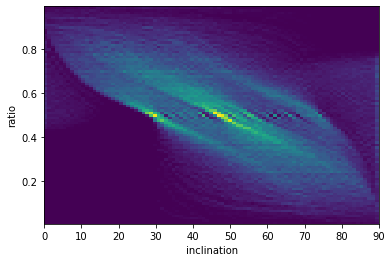

In [101]:

plt.hist2d(df_new_transient['inclination'], df_new_transient['ratio'], bins=89)
plt.xlabel('inclination')
plt.ylabel('ratio')

Text(0, 0.5, 'dincl')

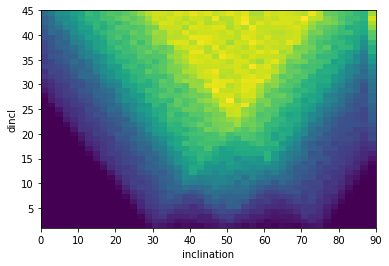

In [102]:
plt.hist2d(df_new_transient['inclination'], df_new_transient['dincl'], bins=45)
plt.xlabel('inclination')
plt.ylabel('dincl')

# How many ULXs will eROSITA see?

A first calculation we may perform is what percentage of our ULX population we will be able to see purely due to beaming.

the beaming factor, b, for random inclination essentially provides the probability of observing the source down the cone, since it is a ratio of the solid angle of a sphere to the size subtended by the two cones.

We may hence obtain a very crude upper limit for the number of ULXs observed by eRosita in the following manner:

For our sample of binary systems, we can calculate what percentage of them are ULXs, and what percentage of them are above the eROSITA detection threshold.

If we know how many binary systems eROSITA is predicted to observe, we can find what percentage of them would be ULXs from greg's population synthesis, 

number_of_ulxs/number_of_systems_above_erosita_threshold = number_of_observed_ulxs/number_of_observed_binary_systems

https://www.eso.org/sci/meetings/2012/surveys2012/Presentations/Day4-Thursday/Merloni.pdf slide 18 has the eROSITA limits as a function of each observing cycle in units erg/s/cm^2

https://www.aanda.org/articles/aa/pdf/2014/07/aa23766-14.pdf performed simulations on the number of XRBs that would be detected by eROSITA



In [103]:
#ULXs only
all_systems_df = load_systems_dataframe(False, False, False)
systems_df = load_systems_dataframe(True, False, False)
print(f'number of binary systems: {len(all_systems_df)}')
print(f'number of ULXs: {len(systems_df)} ({round(len(systems_df)/len(all_systems_df)*100, 3)}% of all systems)')
b_sum = systems_df['b'].sum()
print(f'number of visible ULXs: {round(b_sum,0)} ({round(b_sum/len(systems_df)*100,2)}% of all ULXs)')

number of binary systems: 36420
number of ULXs: 992 (2.724% of all systems)
number of visible ULXs: 823.0 (83.01% of all ULXs)


In [104]:
#EROSITA_stats
MEGA_PARSEC = 3.08567758E18*1E6 # cm
erosita = pd.DataFrame()
erosita['cycle_number'] = [1,2,3,4,8]
erosita['f_lim'] = [4.5E-14, 2.8E-14, 2.1E-14, 1.8E-14, 1.1E-14] #0.5 - 2Kev erg/cm^2/s
erosita['ULX_D_lim'] = np.sqrt(1E39/(4*np.pi*erosita['f_lim'])) #cm
erosita['ULX_D_lim_Mpc'] = erosita['ULX_D_lim']/MEGA_PARSEC
erosita['number_of_galaxies'] = [1525, 2594, 3519, 4109, 6306] #from Daniel, https://www.overleaf.com/read/tsdhqsdtvffh

erosita

,cycle_number,f_lim,ULX_D_lim,ULX_D_lim_Mpc,number_of_galaxies
0,1,4.500000e-14,4.205221e+25,13.628193,1525
1,2,2.800000e-14,5.331090e+25,17.276888,2594
2,3,2.100000e-14,6.155813e+25,19.949631,3519
3,4,1.800000e-14,6.649038e+25,21.548065,4109
4,8,1.100000e-14,8.505478e+25,27.564377,6306


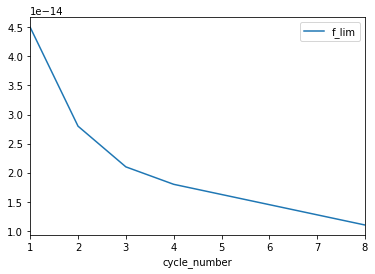

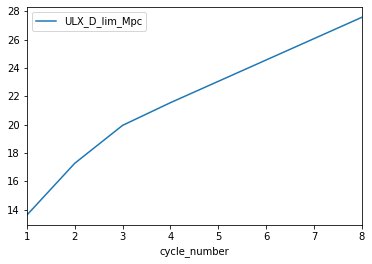

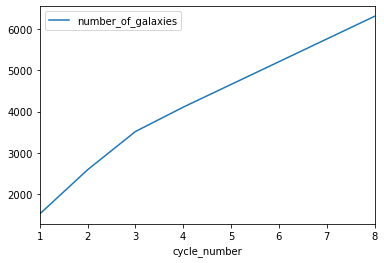

In [105]:
erosita.plot(x='cycle_number', y='f_lim')
erosita.plot(x='cycle_number', y='ULX_D_lim_Mpc')
erosita.plot(x='cycle_number', y='number_of_galaxies')

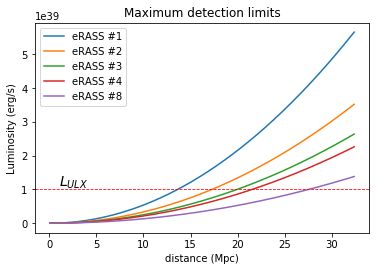

In [106]:
def L(D, f_lim):
    return 4 * np.pi * D**2 * f_lim

erosita.f_lim[0]
x = np.linspace(1e23, 1e26, 1000)
y = L(x, erosita.f_lim[0])
x_mpc = x/MEGA_PARSEC

# plt.figure(figsize=(4,3))
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)
plt.plot(x_mpc, L(x, erosita.f_lim[0]), label='eRASS #1')
plt.plot(x_mpc, L(x, erosita.f_lim[1]), label='eRASS #2')
plt.plot(x_mpc, L(x, erosita.f_lim[2]), label='eRASS #3')
plt.plot(x_mpc, L(x, erosita.f_lim[3]), label='eRASS #4')
plt.plot(x_mpc, L(x, erosita.f_lim[4]), label='eRASS #8')
plt.legend()

plt.title('Maximum detection limits')
plt.xlabel('distance (Mpc)')
plt.ylabel('Luminosity (erg/s)')

plt.text(x=1, y=1.1e39, s=r'$L_{ULX}$', fontsize=14)
plt.axhline(1e39, c='red', linestyle='--', linewidth=0.8)
#plt.savefig('figures/erosita_detection_limits.png', dpi=200)
#plt.savefig('figures/erosita_detection_limits.eps')


## ULXLC Lightcurve estimate
One suggestion from Matt was to fold in the precession period of a Lense-Thirring cycle into the light curves obtained from ULXLC and then perform a 4 year simulation of the times it would have been observed using eROSITA.

Since all of our curves are normalised to have an period of 10 abitrary units, we can normalise a given curve to a given period in the following manner:
    
$$curve['Time'] = curve['Time'] / 10 * P_{wind}$$

With a lightcurve normalised to have a period equal to Lense-Thirring precession cycle, we can then simulate the
source being instantaneously observed 8 times with equal intervals of 6 months.

We will obtain the following:

| Observation # | Flux_value (erg/s) | Is ULX? |
|---------------|--------------------|---------|
| 1             | 3e39               | True    |
| 2             | 1.5e39             | True    |
| 3             | 7e38               | False   |
| ...           | ...                | ...     |
| 8             | 1.6e39             | True    |
    
In a flux-limited survey such as eROSITA, the limiting distance for a source being detected would be given by:
 
$$D_{lim} = \sqrt{L_{x, app} / 4 \pi f_{lim}}$$

see: https://arxiv.org/pdf/1811.08998.pdf section 4 & https://eprints.soton.ac.uk/414471/1/population_v2.pdf

Doing this for an ensamle of ULXs, could maybe obtain something like:

| Source | is_bh | Lx     |#_observed_as_ULX| Prob_ULX_obs | D_lim RASS #1 | D_lim RASS #2 |
|--------|-------|--------|-----------------|--------------|---------------|---------------|
| 913    | True  | 3e39   |2$\pm$0.2        | 0.3$\pm$0.03 | 2Mpc          | 3Mpc          |
| 217    | False | 1.7e39 |7$\pm$0.3        | 0.9$\pm$0.02 | 1.5Mpc        | 2Mpc          |
| 316    | True  | 4e40   |8$\pm$0.001      | 1.0$\pm$0.001| 3Mpc          | 3.7Mpc        |
    
Talking to Adam, basically I need to define my question better...
    
    For a given ULX, what is the probability that eROSITA will observe the source as a ULX?
        --> if f_lim < 1e39 This is set by the alive/dead ratio calculated for each source?
        
    (At a given distance,) How many ULXs will eROSITA see?
    (At a given distance,) What percentage of the ULX population will eROSITA see?
    (At a given distance,) What percentage of our artificial ULX population will eROSITA see?

However a suggestion was to cut all my lightcurves at the ULX limit, then add on the eROSITA limiting flux,
if f_lim < 1e39 --> we will always be able to detect the source when it is in the ULX state
if f_lim > 1e39 --> We will only be able to detect the source if it is above 1e39

There are a few numbers that we need eg:
Number of ULX systems = Number_of_alive_systems + Number_of_transient_systems

Number of ULXs that could have been detected = Number_of_alive_systems + Percentage of time as ULX * Number_of_transient_systems

Number_of_ulxs detected by eROSITA = Number of ULXs that could have been detected * percentage of time above detection threshold

For a fixed distance:
$$N_{ULX} = N_{alive} + N_{transient} + N_{dead}$$
$$N_{Detectable} = N_{alive} + \sum^{N_{transient}}_{n=1}P_{alive}(n)$$

$$N_{Detected} = N_{Detectable} * P_{detection}$$

$$P_{detection} = ?$$

$$ \%_{detected} = N_{Detected} / N_{Detectable}$$



In [107]:
def load_curve_file_skip_footer(path):
    '''
    path: pathlib Path
    '''
    curve = pd.read_csv(path, delimiter=' ', header=None,
                        names=['Time', 'Time_Err', 'Flux'], skiprows=3,
                        skipfooter=9)
    return curve

In [108]:
curve = load_curve_file_skip_footer('../data/interim/curves/151_systems_0_inclination_curves/510-24.txt')
curve2 = load_curve_file_skip_footer('../src/new_curves/082283f0-6b1a-4dd6-bd52-abffbc3698ce.txt')

/home/nk7g14/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


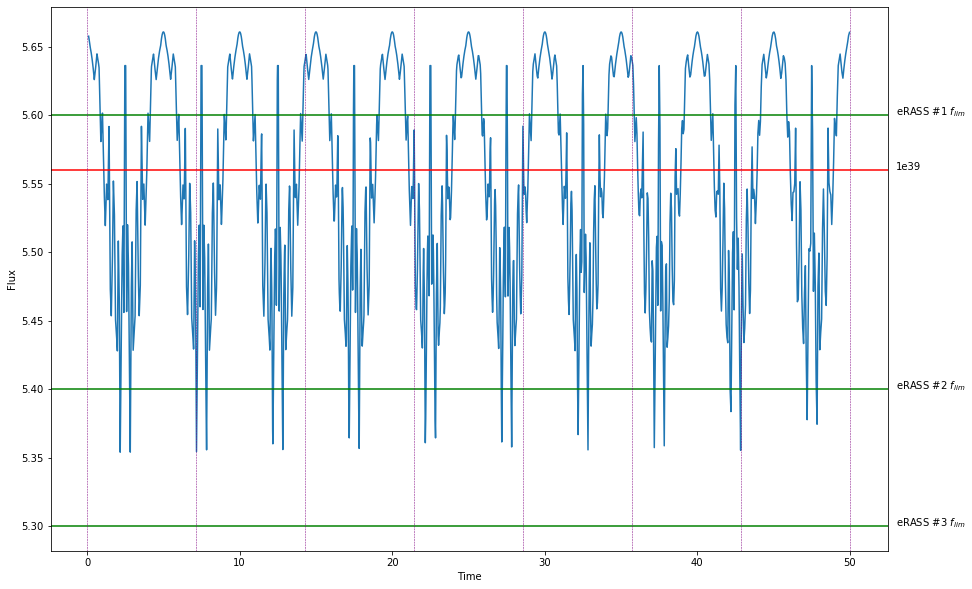

In [109]:
#Example case
plt.figure(figsize=(15,10))
plt.xlabel('Time')
plt.ylabel('Flux')

# plt.plot(curve['Time'], curve['Flux'], label='curve1')
plt.plot(curve2['Time'], curve2['Flux'], label='curve2')
plt.axhline(5.56, c='red')
plt.axhline(5.6, c='green')
plt.axhline(5.4, c='green')
plt.axhline(5.3, c='green')
plt.text(s='1e39', x=53, y=5.56)
plt.text(s='eRASS #1 $f_{lim}$', x=53, y=5.6)
plt.text(s='eRASS #2 $f_{lim}$', x=53, y=5.4)
plt.text(s='eRASS #3 $f_{lim}$', x=53, y=5.3)

for i in np.linspace(0,50,8):
    plt.axvline(x=i, c='purple', linestyle='--', linewidth=0.5)

## Effect of chaning the flux limit on the alive/dead time
We have upto now only considered the alive/dead/transient ULXs as defined by the 1e39 erg/s flux limit.

Each eRASS cycle, deeper fluxes will be probed, and equiviliently, further distances...


# Looking at Earnshaw ULX cat to obtain constraints on alive/dead/transient sources

In [110]:
from astropy.io import fits

In [111]:
ulx_file = '../data/external/Earnshaw_ULX_cat/earnshaw_Xraycatalogue.fits'
with fits.open(ulx_file) as hdul:
    #hdul.info()
    data = pd.DataFrame(hdul[1].data)

In [112]:
data

,DETID,SRCID,DR3SRCID,DR3DETID,DR3DETDIST,DR3SRCDIST,DR3MULT,IAUNAME,SRC_NUM,OBS_ID,REVOLUT,MJD_START,MJD_STOP,OBS_CLASS,PN_FILTER,M1_FILTER,M2_FILTER,PN_SUBMODE,M1_SUBMODE,M2_SUBMODE,RA,DEC,POSERR,LII,BII,RADEC_ERR,SYSERRCC,REFCAT,POSCOROK,RA_UNC,DEC_UNC,EP_1_FLUX,EP_1_FLUX_ERR,EP_2_FLUX,EP_2_FLUX_ERR,EP_3_FLUX,EP_3_FLUX_ERR,EP_4_FLUX,EP_4_FLUX_ERR,EP_5_FLUX,EP_5_FLUX_ERR,EP_8_FLUX,EP_8_FLUX_ERR,EP_9_FLUX,EP_9_FLUX_ERR,PN_1_FLUX,PN_1_FLUX_ERR,PN_2_FLUX,PN_2_FLUX_ERR,PN_3_FLUX,PN_3_FLUX_ERR,PN_4_FLUX,PN_4_FLUX_ERR,PN_5_FLUX,PN_5_FLUX_ERR,PN_8_FLUX,PN_8_FLUX_ERR,PN_9_FLUX,PN_9_FLUX_ERR,M1_1_FLUX,M1_1_FLUX_ERR,M1_2_FLUX,M1_2_FLUX_ERR,M1_3_FLUX,M1_3_FLUX_ERR,M1_4_FLUX,M1_4_FLUX_ERR,M1_5_FLUX,M1_5_FLUX_ERR,M1_8_FLUX,M1_8_FLUX_ERR,M1_9_FLUX,M1_9_FLUX_ERR,M2_1_FLUX,M2_1_FLUX_ERR,M2_2_FLUX,M2_2_FLUX_ERR,M2_3_FLUX,M2_3_FLUX_ERR,M2_4_FLUX,M2_4_FLUX_ERR,M2_5_FLUX,M2_5_FLUX_ERR,M2_8_FLUX,M2_8_FLUX_ERR,M2_9_FLUX,M2_9_FLUX_ERR,EP_8_RATE,EP_8_RATE_ERR,EP_9_RATE,EP_9_RATE_ERR,PN_1_RATE,PN_1_RATE_ERR,PN_2_RATE,PN_2_RATE_ERR,PN_3_RATE,PN_3_RATE_ERR,PN_4_RATE,PN_4_RATE_ERR,PN_5_RATE,PN_5_RATE_ERR,PN_8_RATE,PN_8_RATE_ERR,PN_9_RATE,PN_9_RATE_ERR,M1_1_RATE,M1_1_RATE_ERR,M1_2_RATE,M1_2_RATE_ERR,M1_3_RATE,M1_3_RATE_ERR,M1_4_RATE,M1_4_RATE_ERR,M1_5_RATE,M1_5_RATE_ERR,M1_8_RATE,M1_8_RATE_ERR,M1_9_RATE,M1_9_RATE_ERR,M2_1_RATE,M2_1_RATE_ERR,M2_2_RATE,M2_2_RATE_ERR,M2_3_RATE,M2_3_RATE_ERR,M2_4_RATE,M2_4_RATE_ERR,M2_5_RATE,M2_5_RATE_ERR,M2_8_RATE,M2_8_RATE_ERR,M2_9_RATE,M2_9_RATE_ERR,EP_8_CTS,EP_8_CTS_ERR,PN_8_CTS,PN_8_CTS_ERR,M1_8_CTS,M1_8_CTS_ERR,M2_8_CTS,M2_8_CTS_ERR,EP_8_DET_ML,EP_9_DET_ML,PN_1_DET_ML,PN_2_DET_ML,PN_3_DET_ML,PN_4_DET_ML,PN_5_DET_ML,PN_8_DET_ML,PN_9_DET_ML,M1_1_DET_ML,M1_2_DET_ML,M1_3_DET_ML,M1_4_DET_ML,M1_5_DET_ML,M1_8_DET_ML,M1_9_DET_ML,M2_1_DET_ML,M2_2_DET_ML,M2_3_DET_ML,M2_4_DET_ML,M2_5_DET_ML,M2_8_DET_ML,M2_9_DET_ML,EP_EXTENT,EP_EXTENT_ERR,EP_EXTENT_ML,EP_HR1,EP_HR1_ERR,EP_HR2,EP_HR2_ERR,EP_HR3,EP_HR3_ERR,EP_HR4,EP_HR4_ERR,PN_HR1,PN_HR1_ERR,PN_HR2,PN_HR2_ERR,PN_HR3,PN_HR3_ERR,PN_HR4,PN_HR4_ERR,M1_HR1,M1_HR1_ERR,M1_HR2,M1_HR2_ERR,M1_HR3,M1_HR3_ERR,M1_HR4,M1_HR4_ERR,M2_HR1,M2_HR1_ERR,M2_HR2,M2_HR2_ERR,M2_HR3,M2_HR3_ERR,M2_HR4,M2_HR4_ERR,PN_1_EXP,PN_2_EXP,PN_3_EXP,PN_4_EXP,PN_5_EXP,M1_1_EXP,M1_2_EXP,M1_3_EXP,M1_4_EXP,M1_5_EXP,M2_1_EXP,M2_2_EXP,M2_3_EXP,M2_4_EXP,M2_5_EXP,PN_1_BG,PN_2_BG,PN_3_BG,PN_4_BG,PN_5_BG,M1_1_BG,M1_2_BG,M1_3_BG,M1_4_BG,M1_5_BG,M2_1_BG,M2_2_BG,M2_3_BG,M2_4_BG,M2_5_BG,PN_1_VIG,PN_2_VIG,PN_3_VIG,PN_4_VIG,PN_5_VIG,M1_1_VIG,M1_2_VIG,M1_3_VIG,M1_4_VIG,M1_5_VIG,M2_1_VIG,M2_2_VIG,M2_3_VIG,M2_4_VIG,M2_5_VIG,PN_ONTIME,M1_ONTIME,M2_ONTIME,EP_ONTIME,PN_OFFAX,M1_OFFAX,M2_OFFAX,EP_OFFAX,PN_MASKFRAC,M1_MASKFRAC,M2_MASKFRAC,DIST_NN,SUM_FLAG,EP_FLAG,PN_FLAG,M1_FLAG,M2_FLAG,TSERIES,SPECTRA,EP_CHI2PROB,PN_CHI2PROB,M1_CHI2PROB,M2_CHI2PROB,PN_FVAR,PN_FVARERR,M1_FVAR,M1_FVARERR,M2_FVAR,M2_FVARERR,VAR_FLAG,VAR_EXP_ID,VAR_INST_ID,SC_RA,SC_DEC,SC_POSERR,SC_DET_ML,SC_EP_1_FLUX,SC_EP_1_FLUX_ERR,SC_EP_2_FLUX,SC_EP_2_FLUX_ERR,SC_EP_3_FLUX,SC_EP_3_FLUX_ERR,SC_EP_4_FLUX,SC_EP_4_FLUX_ERR,SC_EP_5_FLUX,SC_EP_5_FLUX_ERR,SC_EP_8_FLUX,SC_EP_8_FLUX_ERR,SC_EP_9_FLUX,SC_EP_9_FLUX_ERR,SC_HR1,SC_HR1_ERR,SC_HR2,SC_HR2_ERR,SC_HR3,SC_HR3_ERR,SC_HR4,SC_HR4_ERR,SC_EXTENT,SC_EXT_ML,SC_CHI2PROB,SC_FVAR,SC_FVARERR,SC_VAR_FLAG,SC_SUM_FLAG,SC_EP_8_FMIN,SC_EP_8_FMIN_ERR,SC_EP_8_FMAX,SC_EP_8_FMAX_ERR,MJD_FIRST,MJD_LAST,N_DETECTIONS,CONFUSED,HIGH_BACKGROUND,NAME,ALT_NAME_1,ALT_NAME_2,PGC_NAME,RA_RC3,DEC_RC3,RADIAL_VELOCITY,DISTANCE,BT_MAG,MORPH_TYPE,LII_RC3,BII_RC3,SG_LON,SG_LAT,REF_MORPH_TYPE,HUBBLE_STAGE,HUBBLE_STAGE_ERROR,LUM_CLASS,LUM_CLASS_ERROR,NUM_LUM_CLASS_ESTIMATES,LOG_D25,LOG_D25_FLAG,LOG_D25_ERROR,LOG_R25,LOG_R25_FLAG,LOG_R25_ERROR,LOG_DO,LOG_AE,LOG_AE_ERROR,POSITION_ANGLE,BT_MAG_FLAG,BT_MAG_ERROR,PHOT_MAG,PHOT_MAG_ERROR,BT_MAG_CORR,SURF_BRTNESS_D25,SURF_BRTNESS_D25_ERROR,SURF_BRTNESS_AE,SURF_BRTNESS_AE_ERROR,FAR_IR_MAG,H_21CM_MAG,H_21CM_MAG_ERROR,BV_COLOR_TOT,BV_COLOR_TOT_ERROR,BV_COLOR_AE,BV_COLOR_AE_ERROR,BV_COLOR_TOT_CORR,UB_COLOR_TOT,UB_COLOR_TOT_ERR

In [113]:
#Sources with more than 1 obervation
sources = data['SRCID'].value_counts()[data['SRCID'].value_counts() > 1].sort_values(ascending=False)
sources

901      14
894      13
1498     12
1448     11
1915     11
         ..
22595     2
28835     2
17095     2
14550     2
31024     2
Name: SRCID, Length: 351, dtype: int64

In [114]:
src901 = data[data['SRCID'] == 901].sort_values(by=['MJD_START'])
src901

,DETID,SRCID,DR3SRCID,DR3DETID,DR3DETDIST,DR3SRCDIST,DR3MULT,IAUNAME,SRC_NUM,OBS_ID,REVOLUT,MJD_START,MJD_STOP,OBS_CLASS,PN_FILTER,M1_FILTER,M2_FILTER,PN_SUBMODE,M1_SUBMODE,M2_SUBMODE,RA,DEC,POSERR,LII,BII,RADEC_ERR,SYSERRCC,REFCAT,POSCOROK,RA_UNC,DEC_UNC,EP_1_FLUX,EP_1_FLUX_ERR,EP_2_FLUX,EP_2_FLUX_ERR,EP_3_FLUX,EP_3_FLUX_ERR,EP_4_FLUX,EP_4_FLUX_ERR,EP_5_FLUX,EP_5_FLUX_ERR,EP_8_FLUX,EP_8_FLUX_ERR,EP_9_FLUX,EP_9_FLUX_ERR,PN_1_FLUX,PN_1_FLUX_ERR,PN_2_FLUX,PN_2_FLUX_ERR,PN_3_FLUX,PN_3_FLUX_ERR,PN_4_FLUX,PN_4_FLUX_ERR,PN_5_FLUX,PN_5_FLUX_ERR,PN_8_FLUX,PN_8_FLUX_ERR,PN_9_FLUX,PN_9_FLUX_ERR,M1_1_FLUX,M1_1_FLUX_ERR,M1_2_FLUX,M1_2_FLUX_ERR,M1_3_FLUX,M1_3_FLUX_ERR,M1_4_FLUX,M1_4_FLUX_ERR,M1_5_FLUX,M1_5_FLUX_ERR,M1_8_FLUX,M1_8_FLUX_ERR,M1_9_FLUX,M1_9_FLUX_ERR,M2_1_FLUX,M2_1_FLUX_ERR,M2_2_FLUX,M2_2_FLUX_ERR,M2_3_FLUX,M2_3_FLUX_ERR,M2_4_FLUX,M2_4_FLUX_ERR,M2_5_FLUX,M2_5_FLUX_ERR,M2_8_FLUX,M2_8_FLUX_ERR,M2_9_FLUX,M2_9_FLUX_ERR,EP_8_RATE,EP_8_RATE_ERR,EP_9_RATE,EP_9_RATE_ERR,PN_1_RATE,PN_1_RATE_ERR,PN_2_RATE,PN_2_RATE_ERR,PN_3_RATE,PN_3_RATE_ERR,PN_4_RATE,PN_4_RATE_ERR,PN_5_RATE,PN_5_RATE_ERR,PN_8_RATE,PN_8_RATE_ERR,PN_9_RATE,PN_9_RATE_ERR,M1_1_RATE,M1_1_RATE_ERR,M1_2_RATE,M1_2_RATE_ERR,M1_3_RATE,M1_3_RATE_ERR,M1_4_RATE,M1_4_RATE_ERR,M1_5_RATE,M1_5_RATE_ERR,M1_8_RATE,M1_8_RATE_ERR,M1_9_RATE,M1_9_RATE_ERR,M2_1_RATE,M2_1_RATE_ERR,M2_2_RATE,M2_2_RATE_ERR,M2_3_RATE,M2_3_RATE_ERR,M2_4_RATE,M2_4_RATE_ERR,M2_5_RATE,M2_5_RATE_ERR,M2_8_RATE,M2_8_RATE_ERR,M2_9_RATE,M2_9_RATE_ERR,EP_8_CTS,EP_8_CTS_ERR,PN_8_CTS,PN_8_CTS_ERR,M1_8_CTS,M1_8_CTS_ERR,M2_8_CTS,M2_8_CTS_ERR,EP_8_DET_ML,EP_9_DET_ML,PN_1_DET_ML,PN_2_DET_ML,PN_3_DET_ML,PN_4_DET_ML,PN_5_DET_ML,PN_8_DET_ML,PN_9_DET_ML,M1_1_DET_ML,M1_2_DET_ML,M1_3_DET_ML,M1_4_DET_ML,M1_5_DET_ML,M1_8_DET_ML,M1_9_DET_ML,M2_1_DET_ML,M2_2_DET_ML,M2_3_DET_ML,M2_4_DET_ML,M2_5_DET_ML,M2_8_DET_ML,M2_9_DET_ML,EP_EXTENT,EP_EXTENT_ERR,EP_EXTENT_ML,EP_HR1,EP_HR1_ERR,EP_HR2,EP_HR2_ERR,EP_HR3,EP_HR3_ERR,EP_HR4,EP_HR4_ERR,PN_HR1,PN_HR1_ERR,PN_HR2,PN_HR2_ERR,PN_HR3,PN_HR3_ERR,PN_HR4,PN_HR4_ERR,M1_HR1,M1_HR1_ERR,M1_HR2,M1_HR2_ERR,M1_HR3,M1_HR3_ERR,M1_HR4,M1_HR4_ERR,M2_HR1,M2_HR1_ERR,M2_HR2,M2_HR2_ERR,M2_HR3,M2_HR3_ERR,M2_HR4,M2_HR4_ERR,PN_1_EXP,PN_2_EXP,PN_3_EXP,PN_4_EXP,PN_5_EXP,M1_1_EXP,M1_2_EXP,M1_3_EXP,M1_4_EXP,M1_5_EXP,M2_1_EXP,M2_2_EXP,M2_3_EXP,M2_4_EXP,M2_5_EXP,PN_1_BG,PN_2_BG,PN_3_BG,PN_4_BG,PN_5_BG,M1_1_BG,M1_2_BG,M1_3_BG,M1_4_BG,M1_5_BG,M2_1_BG,M2_2_BG,M2_3_BG,M2_4_BG,M2_5_BG,PN_1_VIG,PN_2_VIG,PN_3_VIG,PN_4_VIG,PN_5_VIG,M1_1_VIG,M1_2_VIG,M1_3_VIG,M1_4_VIG,M1_5_VIG,M2_1_VIG,M2_2_VIG,M2_3_VIG,M2_4_VIG,M2_5_VIG,PN_ONTIME,M1_ONTIME,M2_ONTIME,EP_ONTIME,PN_OFFAX,M1_OFFAX,M2_OFFAX,EP_OFFAX,PN_MASKFRAC,M1_MASKFRAC,M2_MASKFRAC,DIST_NN,SUM_FLAG,EP_FLAG,PN_FLAG,M1_FLAG,M2_FLAG,TSERIES,SPECTRA,EP_CHI2PROB,PN_CHI2PROB,M1_CHI2PROB,M2_CHI2PROB,PN_FVAR,PN_FVARERR,M1_FVAR,M1_FVARERR,M2_FVAR,M2_FVARERR,VAR_FLAG,VAR_EXP_ID,VAR_INST_ID,SC_RA,SC_DEC,SC_POSERR,SC_DET_ML,SC_EP_1_FLUX,SC_EP_1_FLUX_ERR,SC_EP_2_FLUX,SC_EP_2_FLUX_ERR,SC_EP_3_FLUX,SC_EP_3_FLUX_ERR,SC_EP_4_FLUX,SC_EP_4_FLUX_ERR,SC_EP_5_FLUX,SC_EP_5_FLUX_ERR,SC_EP_8_FLUX,SC_EP_8_FLUX_ERR,SC_EP_9_FLUX,SC_EP_9_FLUX_ERR,SC_HR1,SC_HR1_ERR,SC_HR2,SC_HR2_ERR,SC_HR3,SC_HR3_ERR,SC_HR4,SC_HR4_ERR,SC_EXTENT,SC_EXT_ML,SC_CHI2PROB,SC_FVAR,SC_FVARERR,SC_VAR_FLAG,SC_SUM_FLAG,SC_EP_8_FMIN,SC_EP_8_FMIN_ERR,SC_EP_8_FMAX,SC_EP_8_FMAX_ERR,MJD_FIRST,MJD_LAST,N_DETECTIONS,CONFUSED,HIGH_BACKGROUND,NAME,ALT_NAME_1,ALT_NAME_2,PGC_NAME,RA_RC3,DEC_RC3,RADIAL_VELOCITY,DISTANCE,BT_MAG,MORPH_TYPE,LII_RC3,BII_RC3,SG_LON,SG_LAT,REF_MORPH_TYPE,HUBBLE_STAGE,HUBBLE_STAGE_ERROR,LUM_CLASS,LUM_CLASS_ERROR,NUM_LUM_CLASS_ESTIMATES,LOG_D25,LOG_D25_FLAG,LOG_D25_ERROR,LOG_R25,LOG_R25_FLAG,LOG_R25_ERROR,LOG_DO,LOG_AE,LOG_AE_ERROR,POSITION_ANGLE,BT_MAG_FLAG,BT_MAG_ERROR,PHOT_MAG,PHOT_MAG_ERROR,BT_MAG_CORR,SURF_BRTNESS_D25,SURF_BRTNESS_D25_ERROR,SURF_BRTNESS_AE,SURF_BRTNESS_AE_ERROR,FAR_IR_MAG,H_21CM_MAG,H_21CM_MAG_ERROR,BV_COLOR_TOT,BV_COLOR_TOT_ERROR,BV_COLOR_AE,BV_COLOR_AE_ERROR,BV_COLOR_TOT_CORR,UB_COLOR_TOT,UB_COLOR_TOT_ERR

/home/nk7g14/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


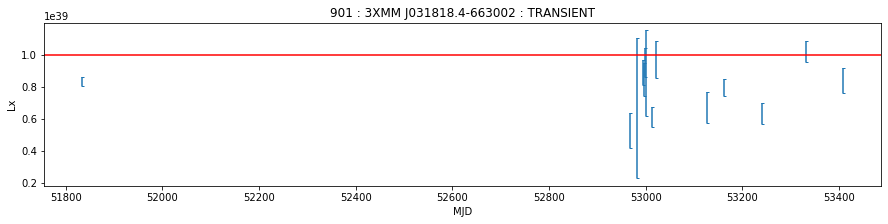

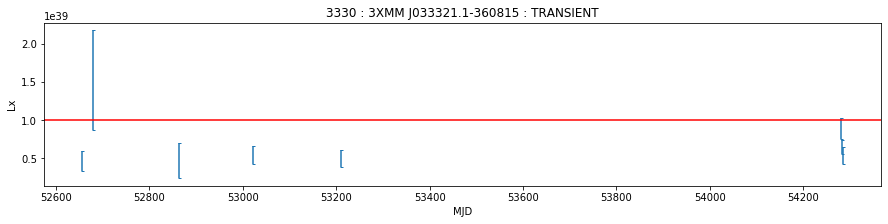

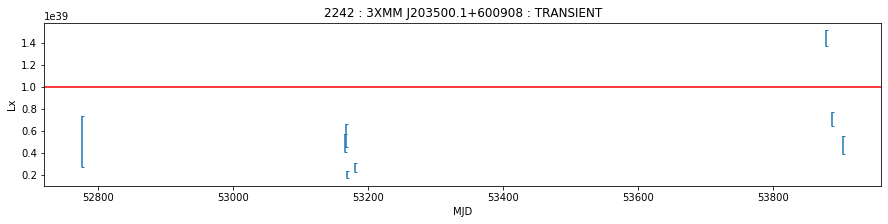

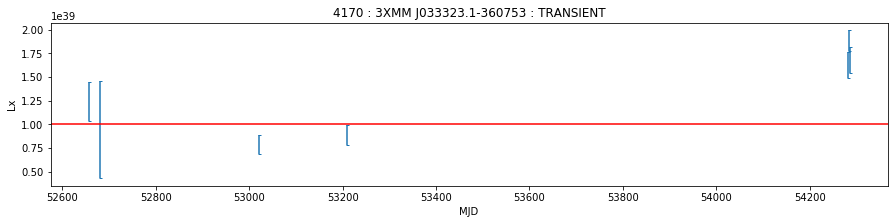

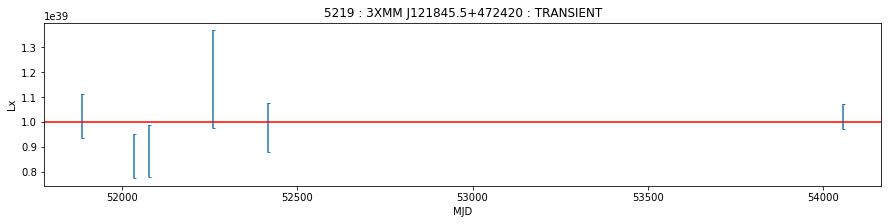

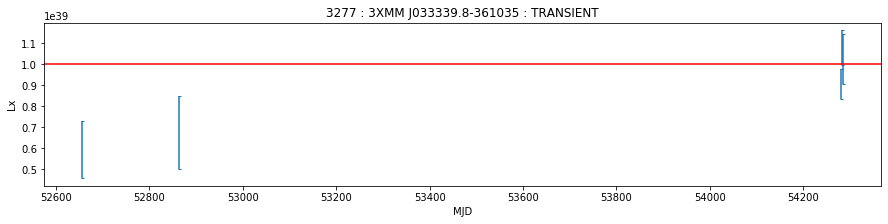

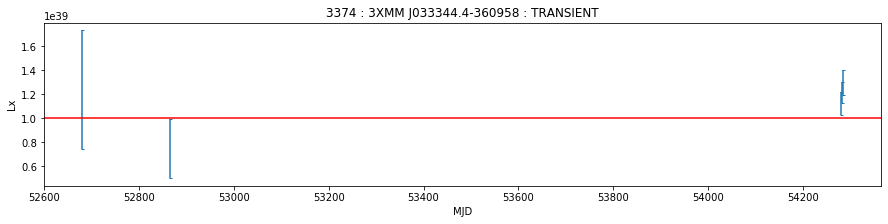

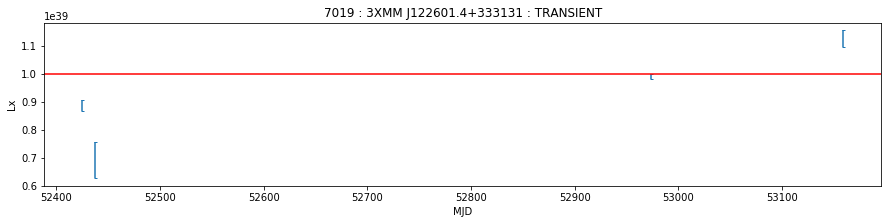

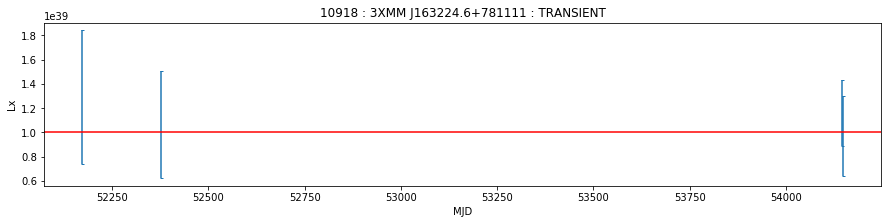

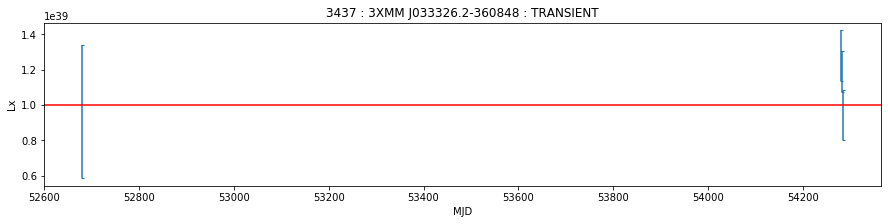

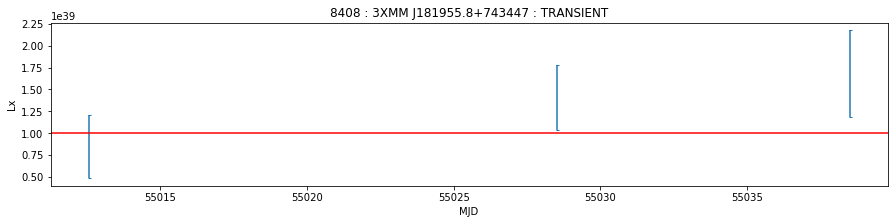

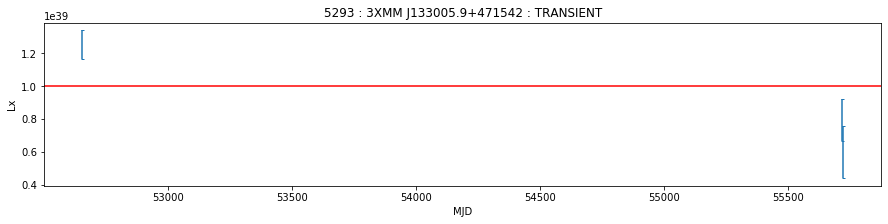

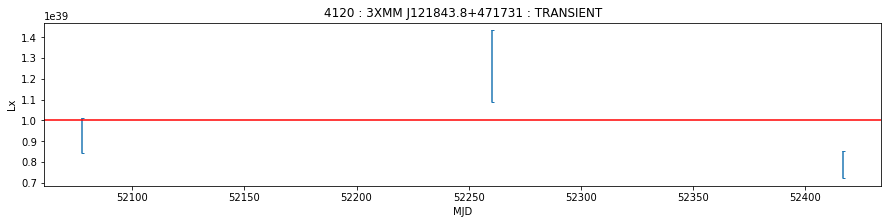

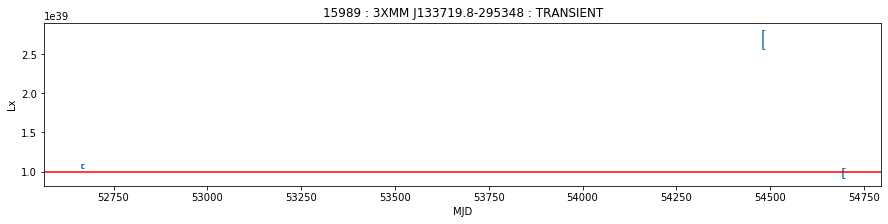

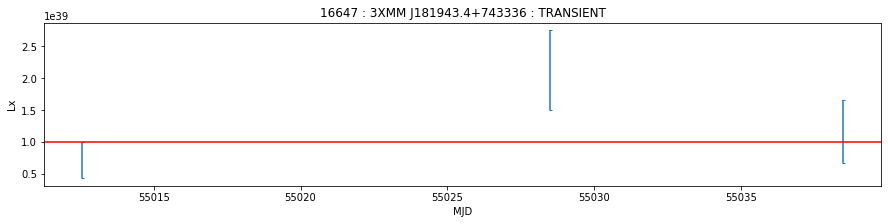

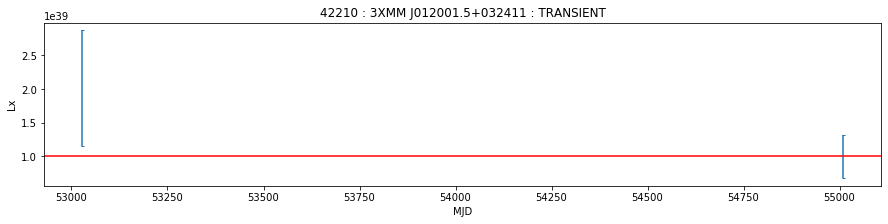

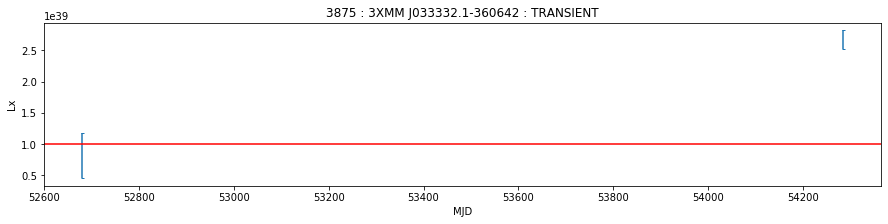

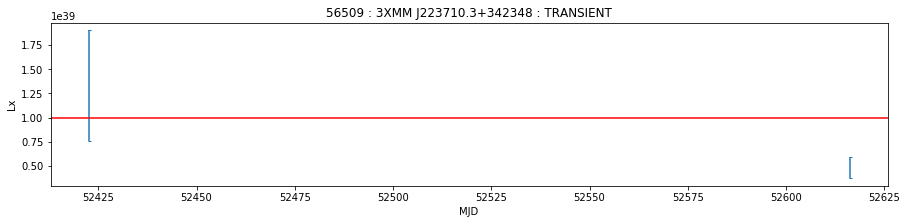

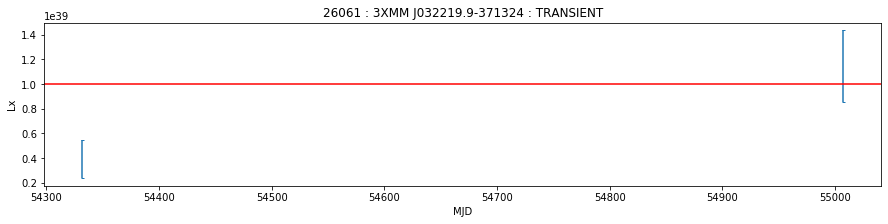

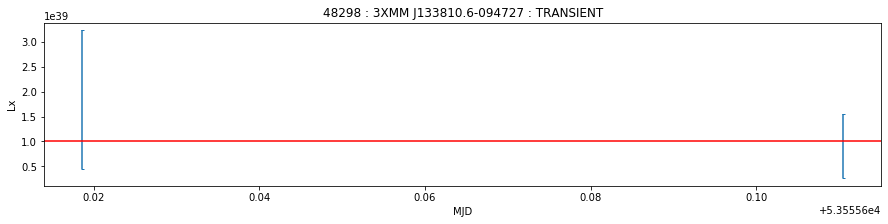

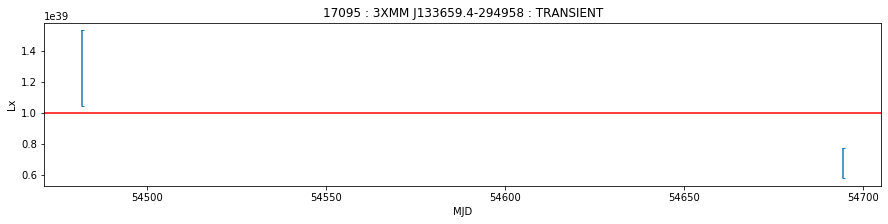

In [115]:
number_of_transients = 0
number_of_dead = 0
number_of_alive = 0
flux_limit = 1E39

for source in sources.index:
    subset = data[data['SRCID'] == source].sort_values(by=['MJD_START'])
    if max(subset['EP_8_LUMINOSITY']) > flux_limit and min(subset['EP_8_LUMINOSITY']) < flux_limit: #TRANSIENT
        plt.figure(figsize=(15,3))
        plt.ylabel('Lx')
        plt.xlabel('MJD')
        plt.title(str(subset['SRCID'].unique()[0]) + ' : ' + subset['IAUNAME'].unique()[0] + ' : TRANSIENT')
        plt.errorbar(subset['MJD_START'], subset['EP_8_LUMINOSITY'], yerr=subset['EP_8_LUMINOSITY_ERR'], fmt='none', capsize=1.5)
        plt.axhline(flux_limit, c='red')
        number_of_transients+=1
    elif max(subset['EP_8_LUMINOSITY_MAX']) < flux_limit: #DEAD
        number_of_dead+=1
    elif min(subset['EP_8_LUMINOSITY'] - subset['EP_8_LUMINOSITY_ERR']) > flux_limit: #Alive
        number_of_alive+=1

## Monte-Carlo Lightcurve sampling

In [116]:
# Monte carlo simulation on the obtained lightcurves to deduce
# To what degree we can characterise a lightcurve as being
# Alive/dead/transient
MC_ITERATIONS = 100000

results_list = []

for source in sources.index:
    results = {}
    alive = 0
    dead = 0
    transient = 0
    print(f'Doing source: {source}')
    subset = data[data['SRCID'] == source].sort_values(by=['MJD_START'])
    simulated_luminosities = []
    
    for index, row in subset.iterrows():
        # print(f"index: {index} ep 8 luminosity: {row['EP_8_LUMINOSITY']}, err: {row['EP_8_LUMINOSITY_ERR']}")
        sample = np.random.normal(loc=row['EP_8_LUMINOSITY'], scale=row['EP_8_LUMINOSITY_ERR'], size=MC_ITERATIONS)
        simulated_luminosities.append(sample)
    
    for i in (np.array(simulated_luminosities).T):
        # print(f'out of {len(i)} points:')
        number_above = len(i[i > 1E39])
        number_below = len(i[i < 1E39])
        if number_below == 0:
            #print('alive')
            alive+=1
        elif number_above == 0:
            #print('dead')
            dead+=1
        else:
            #print(f'transient {number_above}, {number_below}')
            transient+=1
            
    results['SRCID'] = source
    results['alive'] = alive
    results['dead'] = dead
    results['transient'] = transient
    results_list.append(results)

Doing source: 901
Doing source: 894
Doing source: 1498
Doing source: 1448
Doing source: 1915
Doing source: 1983
Doing source: 2231
Doing source: 1972
Doing source: 2049
Doing source: 2732
Doing source: 3330
Doing source: 3372
Doing source: 2241
Doing source: 2242
Doing source: 3137
Doing source: 2630
Doing source: 4349
Doing source: 3180
Doing source: 2602
Doing source: 4170
Doing source: 2749
Doing source: 3508
Doing source: 3593
Doing source: 3701
Doing source: 4578
Doing source: 5303
Doing source: 5219
Doing source: 5351
Doing source: 4943
Doing source: 6058
Doing source: 5589
Doing source: 4355
Doing source: 3442
Doing source: 5241
Doing source: 5218
Doing source: 5230
Doing source: 7419
Doing source: 7480
Doing source: 4415
Doing source: 7352
Doing source: 7782
Doing source: 7835
Doing source: 7284
Doing source: 7569
Doing source: 3277
Doing source: 6996
Doing source: 7590
Doing source: 7589
Doing source: 4196
Doing source: 8508
Doing source: 4294
Doing source: 8293
Doing source: 

In [117]:
MC_results = pd.DataFrame(results_list)
MC_results['classification'] = MC_results[['alive','dead', 'transient']].idxmax(axis=1)
MC_results['confidence'] = MC_results[['alive','dead', 'transient']].max(axis=1)/MC_ITERATIONS
MC_results['confidence_squared'] = MC_results['confidence']**2
# https://faraday.physics.utoronto.ca/PVB/Harrison/ErrorAnalysis/Propagation.html

In [118]:
MC_results.sort_values(by='confidence')

,SRCID,alive,dead,transient,classification,confidence,confidence_squared
291,51654,44384,10321,45295,transient,0.45295,0.205164
222,35211,45570,9119,45311,alive,0.45570,0.207662
204,28876,46359,8705,44936,alive,0.46359,0.214916
183,42210,44059,5959,49982,transient,0.49982,0.249820
49,8508,51606,1,48393,alive,0.51606,0.266318
...,...,...,...,...,...,...,...
128,17104,0,100000,0,dead,1.00000,1.000000
127,19466,0,100000,0,dead,1.00000,1.000000
126,22191,0,100000,0,dead,1.00000,1.000000
134,17987,0,100000,0,dead,1.00000,1.000000


In [119]:
number_of_alive = len(MC_results[MC_results['classification'] == 'alive'])
number_of_alive_err = np.sqrt(MC_results[MC_results['classification'] == 'alive']['confidence_squared'].sum())
number_of_transients = len(MC_results[MC_results['classification'] == 'transient'])
number_of_transients_err = np.sqrt(MC_results[MC_results['classification'] == 'transient']['confidence_squared'].sum())
number_of_dead = len(MC_results[MC_results['classification'] == 'dead'])
number_of_dead_err = np.sqrt(MC_results[MC_results['classification'] == 'dead']['confidence_squared'].sum())


#The total number here is defined only for the alive and transient systems
number_total = number_of_alive + number_of_transients
number_total_err = np.sqrt(number_of_alive_err**2 + number_of_transients_err**2)

percent_of_alive = number_of_alive / (number_total)
percent_of_transients = number_of_transients / (number_total)
percent_of_alive_err = percent_of_alive * np.sqrt((number_total_err/number_total)**2 +  (number_of_alive_err/number_of_alive)**2)
percent_of_transients_err = percent_of_transients * np.sqrt((number_total_err/number_total)**2 +  (number_of_transients_err/number_of_transients)**2)

In [120]:
print(f'Number of alive systems: {number_of_alive} +- {number_of_alive_err}')
print(f'Number of transient systems: {number_of_transients} +- {number_of_transients_err}')
print(f'Number of dead systems: {number_of_dead} +- {number_of_dead_err}')
print(f'% of alive systems: {percent_of_alive} +- {percent_of_alive_err}')
print(f'% of transient systems: {percent_of_transients} +- {percent_of_transients_err}')

Number of alive systems: 65 +- 7.412007981282804
Number of transient systems: 22 +- 3.9089851598081053
Number of dead systems: 264 +- 16.09924127232709
% of alive systems: 0.7471264367816092 +- 0.11151997485777478
% of transient systems: 0.25287356321839083 +- 0.05110777003517043


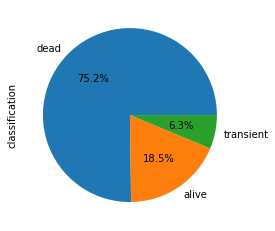

In [121]:
MC_results['classification'].value_counts().plot(kind='pie', autopct='%1.1f%%')

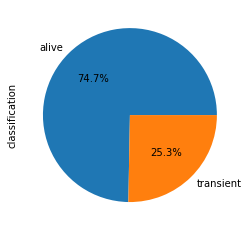

In [122]:
MC_results = MC_results[MC_results['classification'].isin(['transient', 'alive'])]
MC_results['classification'].value_counts().plot(kind='pie', autopct='%1.1f%%')

## Non-MC classification:

In [123]:
print(f'Objects in Earnshaw cat: {len(data["SRCID"].unique())}')
print(f'Objects with more than 1 observation: {len(sources)}')
print(f'Number of Transient ULXs: {number_of_transients}')
print(f'Number of alive ULXs: {number_of_alive}')
print(f'Number of dead ULXs: {number_of_dead}')

Objects in Earnshaw cat: 1314
Objects with more than 1 observation: 351
Number of Transient ULXs: 22
Number of alive ULXs: 65
Number of dead ULXs: 264


([<matplotlib.patches.Wedge at 0x7f738e8bda90>,
 [Text(0.9190366040825596, 0.604459858349913, 'alive'),
  Text(-1.0195330111986227, -0.4129799499688447, 'dead'),
  Text(1.0787436036022486, -0.21520278271257257, 'transient')],
 [Text(0.5012926931359415, 0.3297053772817707, '18.5%'),
  Text(-0.5561089151992487, -0.22526179089209708, '75.2%'),
  Text(0.5884056019648628, -0.11738333602503957, '6.3%')])

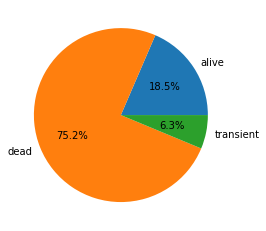

In [124]:
plt.pie([number_of_alive, number_of_dead, number_of_transients], labels=['alive', 'dead', 'transient'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f7391f20a90>,
 [Text(-0.7707641197125196, 0.784807410619819, 'alive'),
  Text(0.7707641931914891, -0.7848073384556703, 'transient')],
 [Text(-0.42041679257046516, 0.4280767694289921, '74.7%'),
  Text(0.4204168326499031, -0.4280767300667292, '25.3%')])

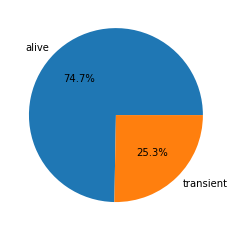

In [125]:
plt.pie([number_of_alive, number_of_transients], labels=['alive', 'transient'], autopct='%1.1f%%')